تحميل المكتبات وقراءة البيانات

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# قراءة البيانات من الملف
file_path = 'car_price.csv'
data = pd.read_csv(file_path)

# عرض بعض الصفوف للتأكد من صحة البيانات
print(data.head())

# عرض ملخص البيانات
print(data.info())


   index                                car_name car_prices_in_rupee  kms_driven fuel_type transmission  ownership  manufacture   engine    Seats
0      0  Jeep Compass 2.0 Longitude Option BSIV          10.03 Lakh  86,226 kms    Diesel       Manual  1st Owner         2017  1956 cc  5 Seats
1      1            Renault Duster RXZ Turbo CVT          12.83 Lakh  13,248 kms    Petrol    Automatic  1st Owner         2021  1330 cc  5 Seats
2      2                      Toyota Camry 2.5 G          16.40 Lakh  60,343 kms    Petrol    Automatic  1st Owner         2016  2494 cc  5 Seats
3      3                       Honda Jazz VX CVT           7.77 Lakh  26,696 kms    Petrol    Automatic  1st Owner         2018  1199 cc  5 Seats
4      4        Volkswagen Polo 1.2 MPI Highline           5.15 Lakh  69,414 kms    Petrol       Manual  1st Owner         2016  1199 cc  5 Seats
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 10 columns):
 #   Column      

##### التحقق من القيم المفقودة

In [73]:
# التحقق من وجود قيم مفقودة في البيانات
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# عرض الإحصائيات الوصفية
print('\n',data.describe())
# إذا وجدت أي قيم مفقودة، قرر كيفية التعامل معها (مثل الحذف أو التعبئة).



Missing values in each column:
 index                  0
car_name               0
car_prices_in_rupee    0
kms_driven             0
fuel_type              0
transmission           0
ownership              0
manufacture            0
engine                 0
Seats                  0
dtype: int64

              index  manufacture
count  5512.000000  5512.000000
mean   2755.500000  2015.455552
std    1591.321673     3.927974
min       0.000000  1995.000000
25%    1377.750000  2013.000000
50%    2755.500000  2016.000000
75%    4133.250000  2018.000000
max    5511.000000  2022.000000


### تنظيف وتحويل البيانات
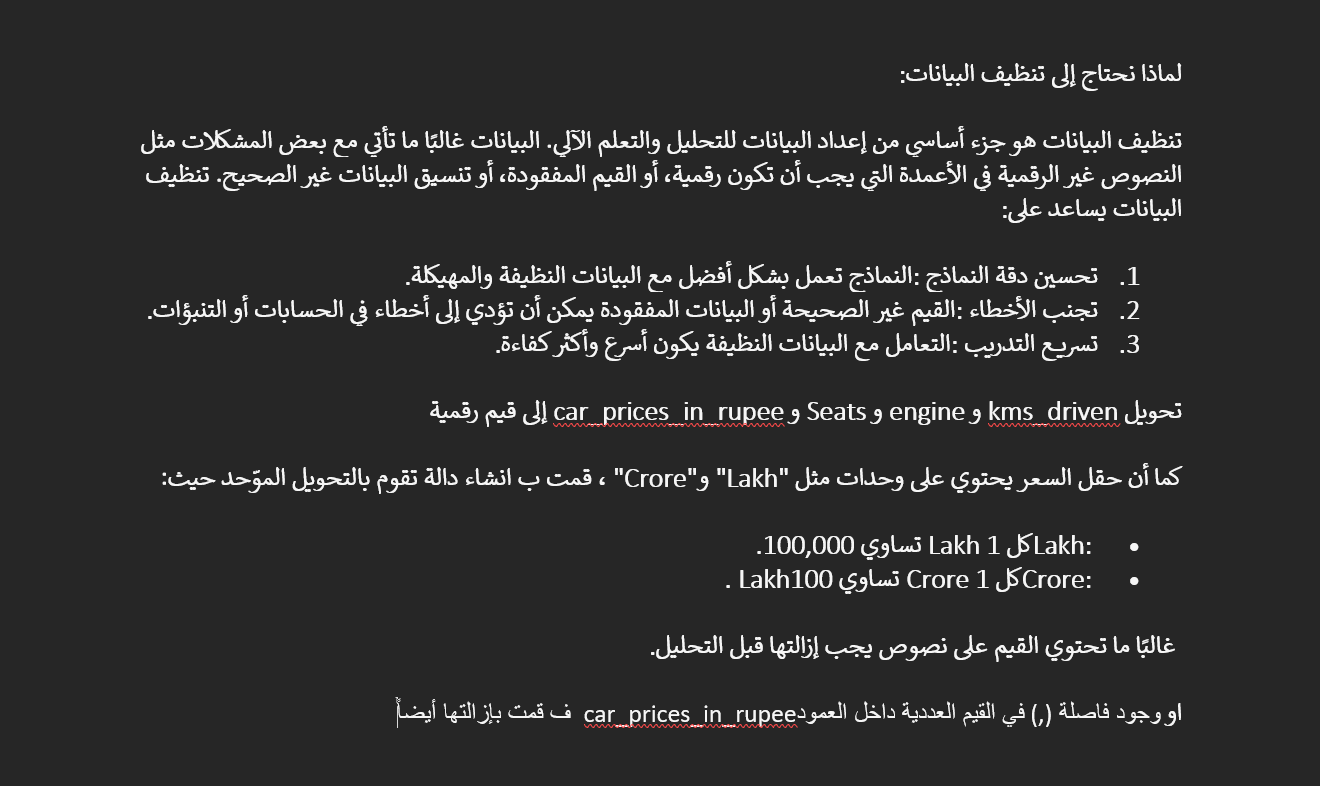

In [74]:
# إزالة النصوص وتحويل القيم إلى أرقام في عمود kms_driven
data['kms_driven'] = data['kms_driven'].str.replace(' kms', '').str.replace(',', '').astype(float)

# إزالة النصوص وتحويل القيم إلى أرقام في عمود engine
data['engine'] = data['engine'].str.replace(' cc', '').astype(float)

# إزالة النصوص وتحويل القيم إلى أرقام في عمود Seats
data['Seats'] = data['Seats'].str.replace(' Seats', '').astype(float)

# التحقق من النتائج بعد التنظيف
print(data[['kms_driven', 'engine', 'Seats']].head())

print('\nThe Price:\n ')

# وظيفة لتحويل القيم
def convert_price(price):
       # إزالة الفواصل
    price = price.replace(',', '')
    if 'Lakh' in price:
        return float(price.replace(' Lakh', ''))
    elif 'Crore' in price:
        return float(price.replace(' Crore', '')) * 100  # لتحويل Crore إلى Lakh
    return price
    
# توحيد الوحدات يضمن أن جميع القيم في نفس المقياس، مما يسهل التحليل والمقارنات.
# استخدام القيم الرقمية النقية يتيح للنماذج الرياضية التعامل مع البيانات بشكل صحيح دون أخطاء.
# القيم الرقمية التي تحتوي على فواصل لا يمكن تحليلها بشكل صحيح كأرقام في معظم المكتبات البرمجية.

# تطبيق التحويل على العمود
data['car_prices_in_rupee'] = data['car_prices_in_rupee'].apply(convert_price)

# التحقق من النتائج بعد التنظيف
print(data['car_prices_in_rupee'].head())



   kms_driven  engine  Seats
0     86226.0  1956.0    5.0
1     13248.0  1330.0    5.0
2     60343.0  2494.0    5.0
3     26696.0  1199.0    5.0
4     69414.0  1199.0    5.0

The Price:
 
0    10.03
1    12.83
2     16.4
3     7.77
4     5.15
Name: car_prices_in_rupee, dtype: object


#####  تحليل البيانات الأولي
##### توزيع البيانات (Histogram)


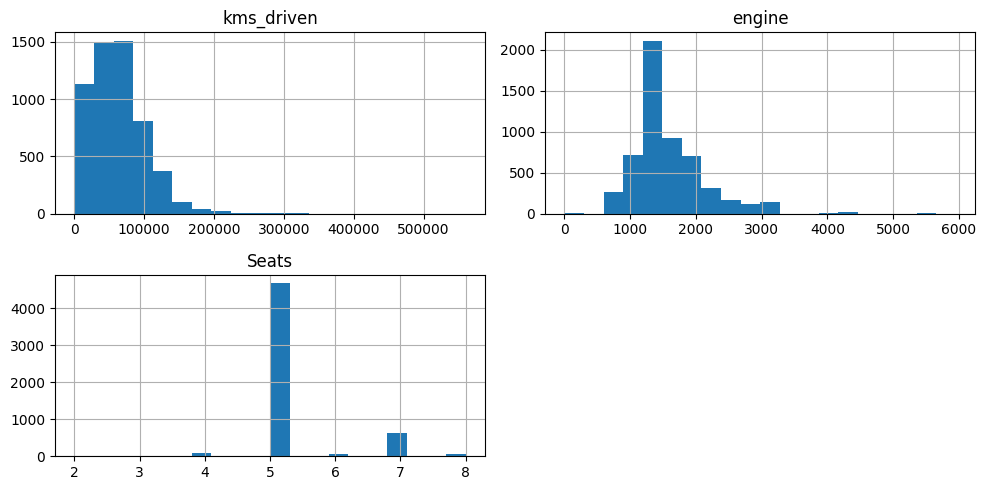

In [75]:
# رسم Histogram للأعمدة الرقمية
data[['kms_driven', 'engine', 'Seats']].hist(bins=20, figsize=(10, 5))
plt.tight_layout()
plt.show()


##### رسم Boxplot


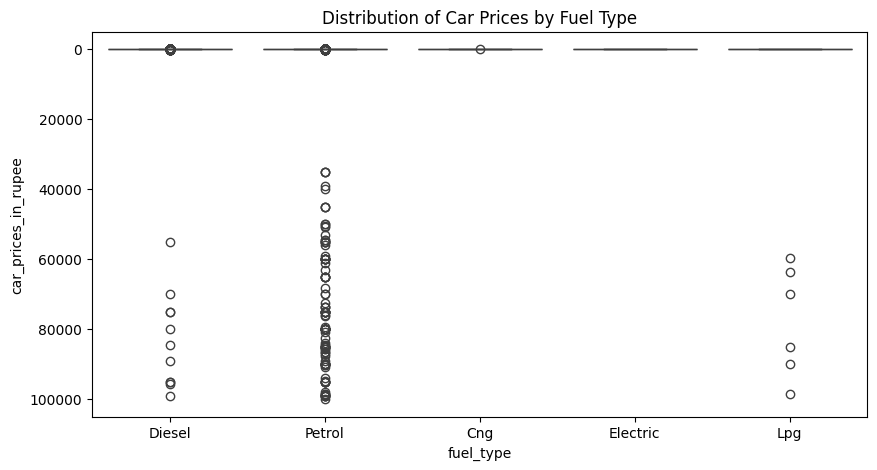

In [76]:
# رسم Boxplot بعد تحويل car_prices_in_rupee إلى أرقام
plt.figure(figsize=(10, 5))
sns.boxplot(x='fuel_type', y='car_prices_in_rupee', data=data)
plt.title('Distribution of Car Prices by Fuel Type')
plt.show()
# نستخدم Boxplot
# 1.لفهم التوزيع: يساعد في التعرف على مدى توزيع البيانات والقيم المركزية.
# 2.لتحديد القيم المتطرفة: يظهر القيم التي تكون خارج النطاق الطبيعي، مما يمكن أن يكون له تأثير على النموذج.


##### تحليل العلاقات باستخدام Pairplot

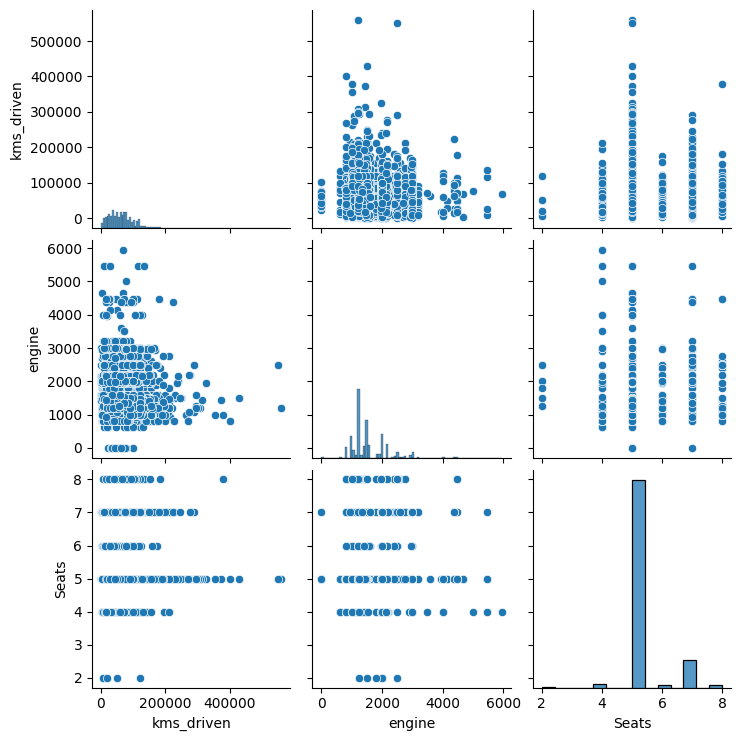

In [77]:
# رسم Pairplot لفهم العلاقات بين الأعمدة المهمة
sns.pairplot(data[['kms_driven', 'engine', 'Seats', 'car_prices_in_rupee']])
plt.show()

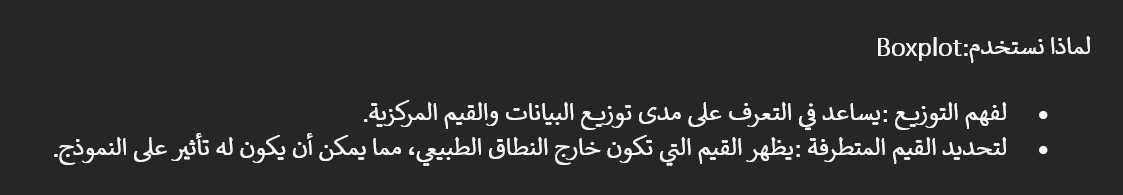
##### بعد تحليل البيانات الأولي نقوم بتحديد أي أعمدة تحتاج إلى معالجة إضافية مثل التشفير أو التطبيع.
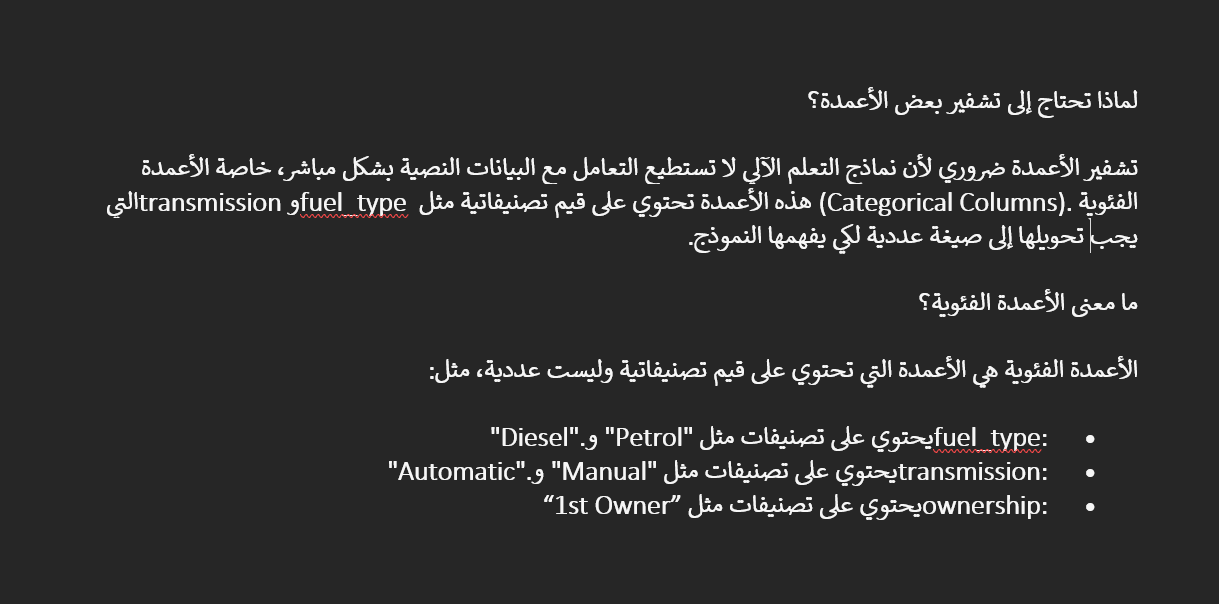

##### حيث سوف نقوم بالتطبيع فيما بعد
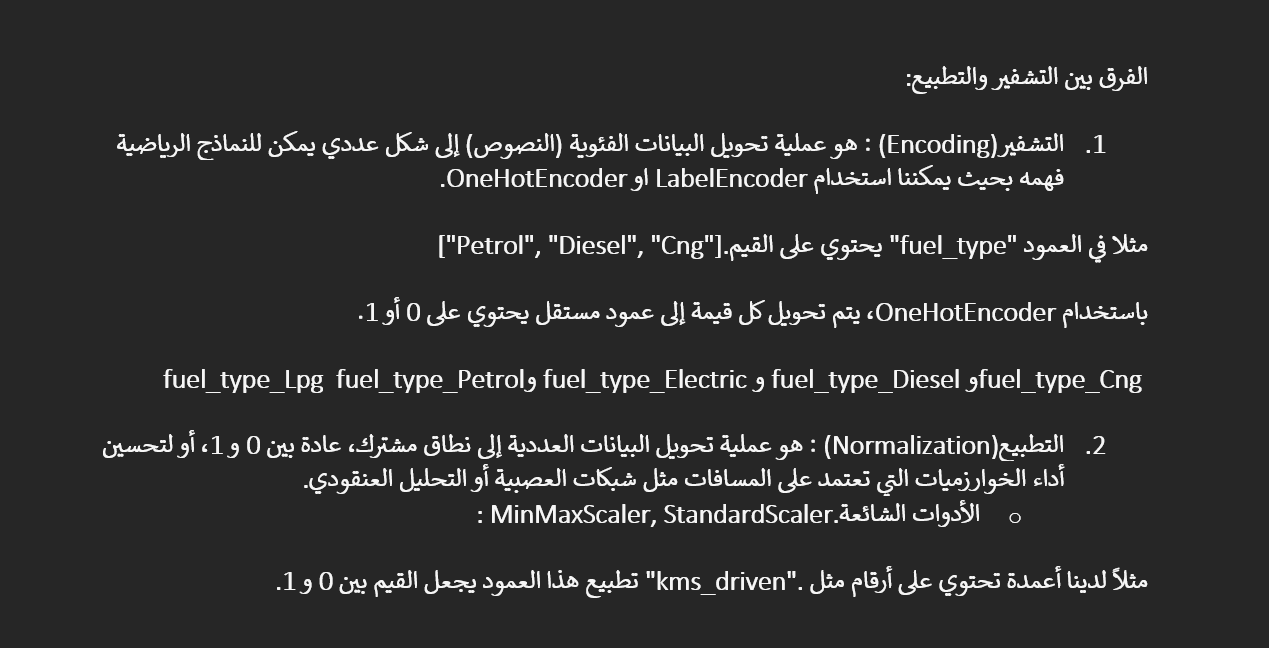

##### لقد وجدت طريقتين ل تشفير البيانات النصية وتحويلها الى رقم وأوجدت الفرق بينهما
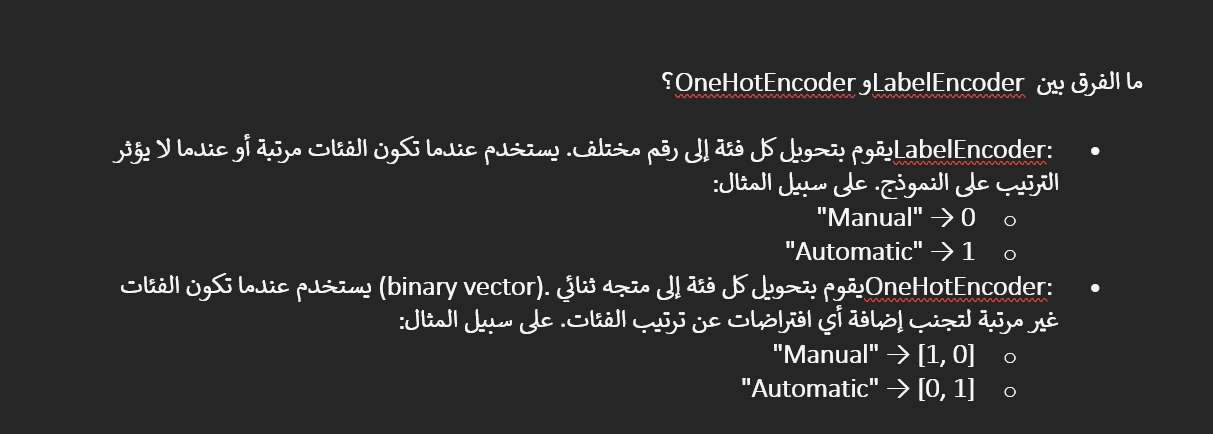

##### اهم خطوة في تنظيف البيانات هي تحديد الfeatures المهمة للتدريب
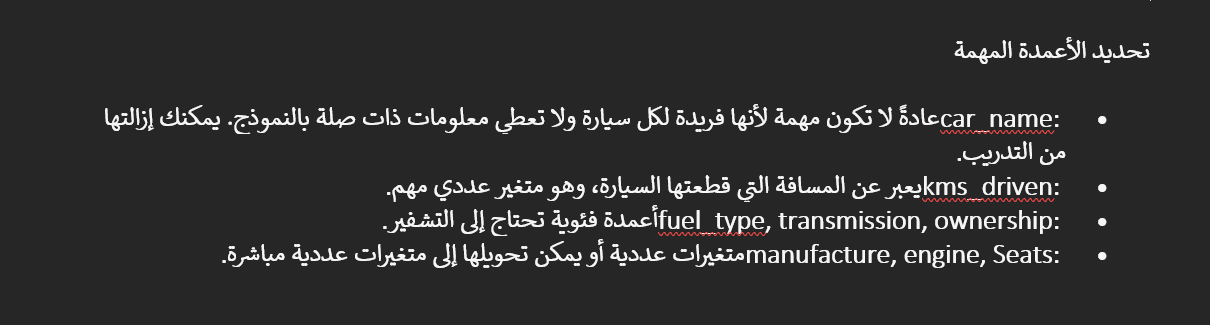

##### تقسيم البيانات إلى Features و Target
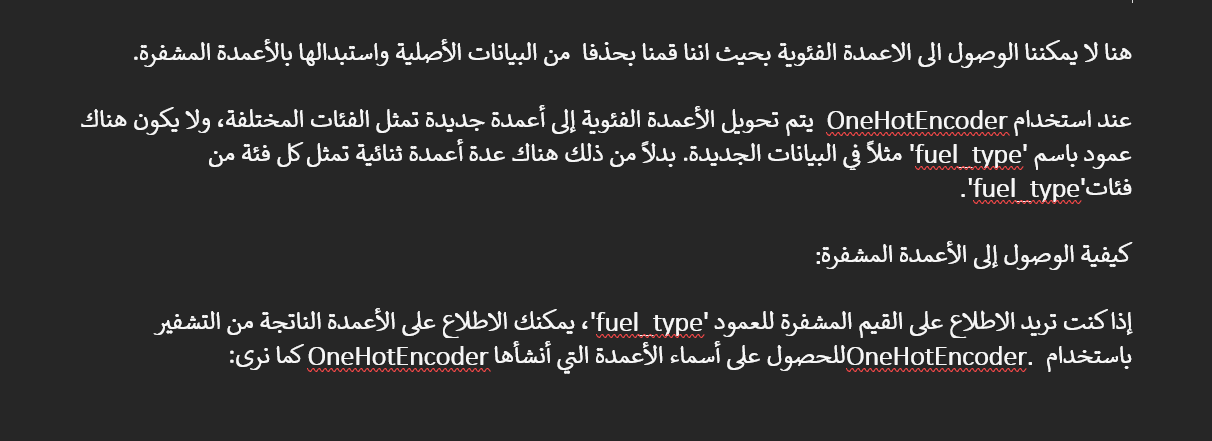


In [78]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# إعداد العرض الكامل للبيانات
pd.set_option('display.max_columns', None)  # عرض جميع الأعمدة
pd.set_option('display.max_rows', None)     # عرض جميع الصفوف
pd.set_option('display.max_colwidth', None) # عرض كامل للعرض النصي في الخلايا
pd.set_option('display.width', 1000)        # عرض البيانات في سطر واحد بشكل أوسع


# إزالة الأعمدة غير المهمة
data = data.drop(['car_name'], axis=1)
data = data.drop(['index'], axis=1)

# تحديد الأعمدة الفئوية لتشفيرها
categorical_cols = ['fuel_type', 'transmission', 'ownership']

# استخدام OneHotEncoder لتشفير الأعمدة الفئوية
#  حيث ان OneHotEncoder
# قام بفصل كل عمود واعاد تسميته الى اعمجة منفصلة ب اسماء مختلفة تعبر عن القيم الموجودة داخله
# بعد التشفير، ستكون هناك أعمدة مثل:
# fuel_type_Diesel
# fuel_type_Petrol

encoder = OneHotEncoder()
encoded_categorical_cols = pd.DataFrame(encoder.fit_transform(data[categorical_cols]).toarray())

# الحصول على أسماء الأعمدة التي تم إنشاؤها بواسطة OneHotEncoder
encoded_categorical_cols.columns = encoder.get_feature_names_out(categorical_cols)

# دمج الأعمدة المشفرة مع البيانات الأصلية
data = data.join(encoded_categorical_cols)

# إزالة الأعمدة الأصلية الفئوية
data = data.drop(categorical_cols, axis=1)

# تقسيم البيانات إلى Features و Target
X = data.drop('car_prices_in_rupee', axis=1)  # Features
y = data['car_prices_in_rupee']               # Target

print('\nThe Input X is:\n',X.head())

print('\nThe Output Y is:\n',y.head())



The Input X is:
    kms_driven  manufacture  engine  Seats  fuel_type_Cng  fuel_type_Diesel  fuel_type_Electric  fuel_type_Lpg  fuel_type_Petrol  transmission_Automatic  transmission_Manual  ownership_0th Owner  ownership_1st Owner  ownership_2nd Owner  ownership_3rd Owner  ownership_4th Owner  ownership_5th Owner
0     86226.0         2017  1956.0    5.0            0.0               1.0                 0.0            0.0               0.0                     0.0                  1.0                  0.0                  1.0                  0.0                  0.0                  0.0                  0.0
1     13248.0         2021  1330.0    5.0            0.0               0.0                 0.0            0.0               1.0                     1.0                  0.0                  0.0                  1.0                  0.0                  0.0                  0.0                  0.0
2     60343.0         2016  2494.0    5.0            0.0               0.0           

##### رسم Heatmap بعد التشفير
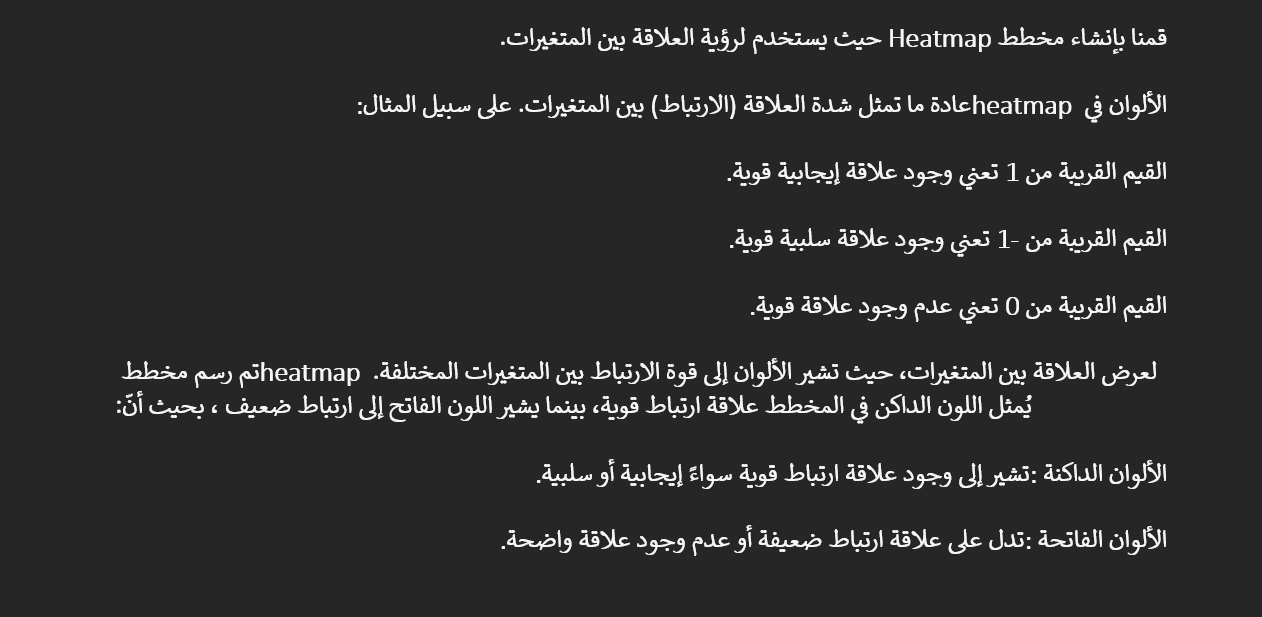

In [79]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # حساب مصفوفة الارتباط
# correlation_matrix = data.corr()

# # رسم heatmap
# plt.figure(figsize=(19, 12))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix Heatmap')
# plt.show()


رسم Pairplot يظهر التفاعل بين كل عمودين

In [80]:
# sns.pairplot(data)
# plt.show()


##### بعد ان قمنا بتظيف البيانات وتشفيرها سوف نقوم بحفظ الداتا المعدلة الى ملف اكسل ليسهل قرائتها 


In [81]:
# import pandas as pd

# # بعد اكتمال معالجة البيانات وتشفيرها
# # نفترض أن البيانات المعالجة موجودة في DataFrame يسمى 'data'

# # حفظ البيانات المعالجة في ملف Excel
# data.to_excel('processed_dataset.xlsx', index=False)

# print("تم حفظ البيانات المعالجة في ملف Excel بنجاح.")


In [82]:
# Normalization (Min-Max Scaling)
from sklearn.preprocessing import MinMaxScaler

# تحديد الأعمدة التي نريد تطبيق Normalization عليها
columns_to_normalize = ['car_prices_in_rupee', 'kms_driven', 'manufacture', 'engine', 'Seats']

# إنشاء كائن MinMaxScaler
scaler = MinMaxScaler()

# تطبيق التحجيم
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

print(data.head())


   car_prices_in_rupee  kms_driven  manufacture    engine  Seats  fuel_type_Cng  fuel_type_Diesel  fuel_type_Electric  fuel_type_Lpg  fuel_type_Petrol  transmission_Automatic  transmission_Manual  ownership_0th Owner  ownership_1st Owner  ownership_2nd Owner  ownership_3rd Owner  ownership_4th Owner  ownership_5th Owner
0             0.000090    0.153597     0.814815  0.328739    0.5            0.0               1.0                 0.0            0.0               0.0                     0.0                  1.0                  0.0                  1.0                  0.0                  0.0                  0.0                  0.0
1             0.000118    0.023221     0.962963  0.223529    0.5            0.0               0.0                 0.0            0.0               1.0                     1.0                  0.0                  0.0                  1.0                  0.0                  0.0                  0.0                  0.0
2             0.000154    0.107357

In [83]:
# import pandas as pd

# data.to_excel('processed_dataset_by_Normalization.xlsx', index=False)

# print("تم حفظ البيانات المعالجة في ملف Excel بنجاح.")

In [84]:
# Standardization (Z-Score Scaling)
from sklearn.preprocessing import StandardScaler

# تحديد الأعمدة التي نريد تطبيق Standardization عليها
columns_to_standardize = ['car_prices_in_rupee', 'kms_driven', 'manufacture', 'engine', 'Seats']

# إنشاء كائن StandardScaler
scaler = StandardScaler()

# تطبيق التحجيم
data[columns_to_standardize] = scaler.fit_transform(data[columns_to_standardize])

print(data.head())


   car_prices_in_rupee  kms_driven  manufacture    engine     Seats  fuel_type_Cng  fuel_type_Diesel  fuel_type_Electric  fuel_type_Lpg  fuel_type_Petrol  transmission_Automatic  transmission_Manual  ownership_0th Owner  ownership_1st Owner  ownership_2nd Owner  ownership_3rd Owner  ownership_4th Owner  ownership_5th Owner
0            -0.147554    0.550046     0.393228  0.731579 -0.348225            0.0               1.0                 0.0            0.0               0.0                     0.0                  1.0                  0.0                  1.0                  0.0                  0.0                  0.0                  0.0
1            -0.147310   -1.194156     1.411657 -0.349299 -0.348225            0.0               0.0                 0.0            0.0               1.0                     1.0                  0.0                  0.0                  1.0                  0.0                  0.0                  0.0                  0.0
2            -0.146999   

In [85]:
# import pandas as pd

# data.to_excel('processed_dataset_by_Standardization.xlsx', index=False)

# print("تم حفظ البيانات المعالجة في ملف Excel بنجاح.")


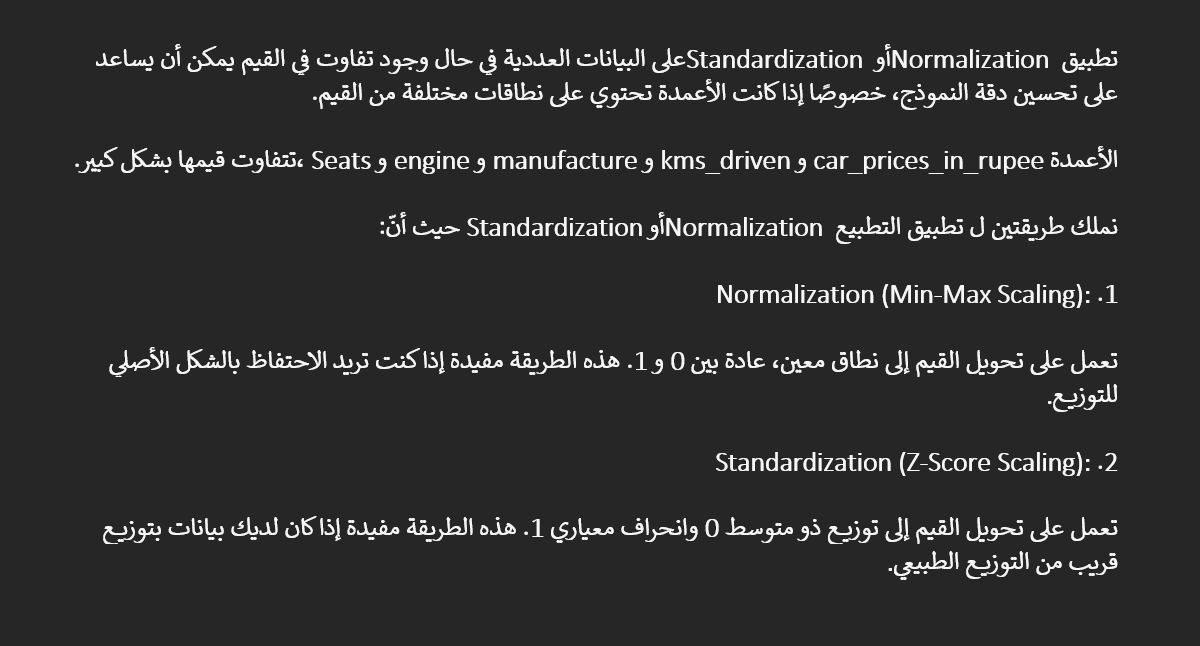
##### Seats: بالرغم من أن القيم عادة ما تكون محدودة (مثل 2، 4، 5، 7)، إلا أنه قد يكون من الأفضل تطبيق التحجيم عليها إذا كان لديك فروقات كبيرة في التوزيع.


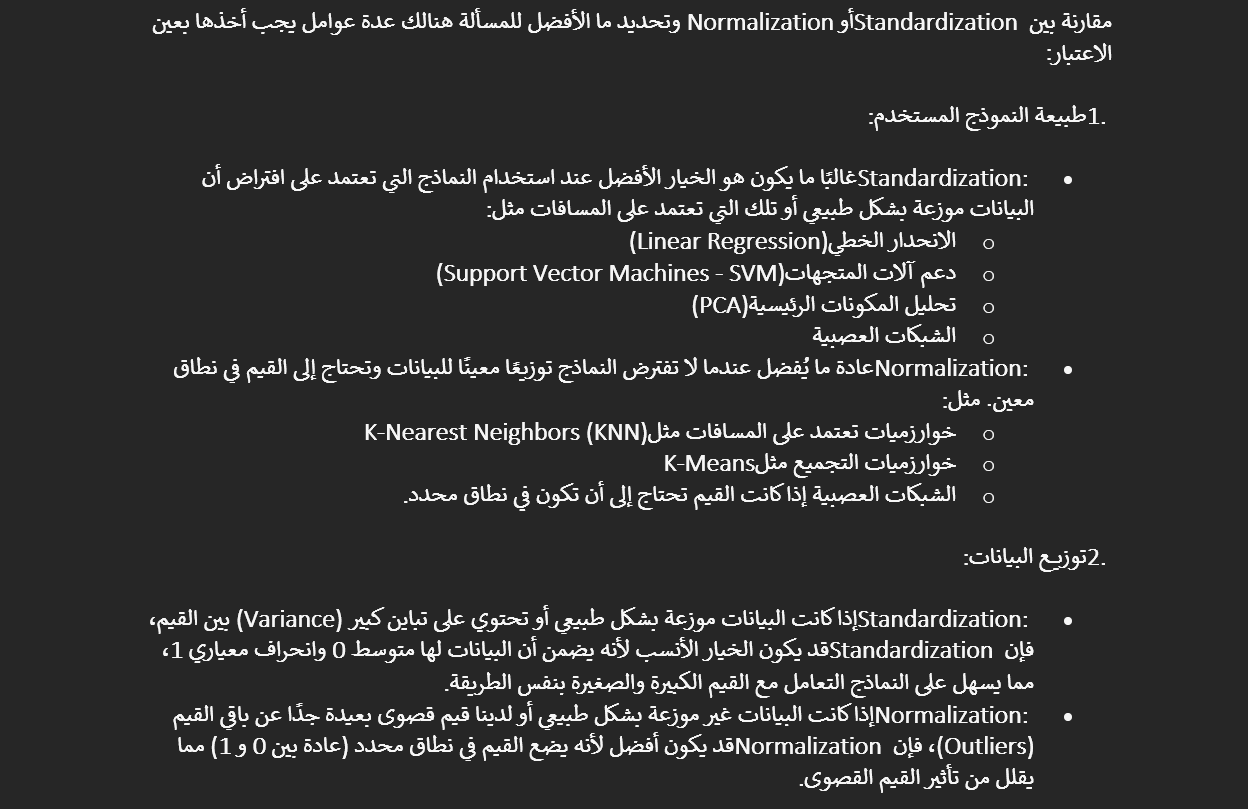
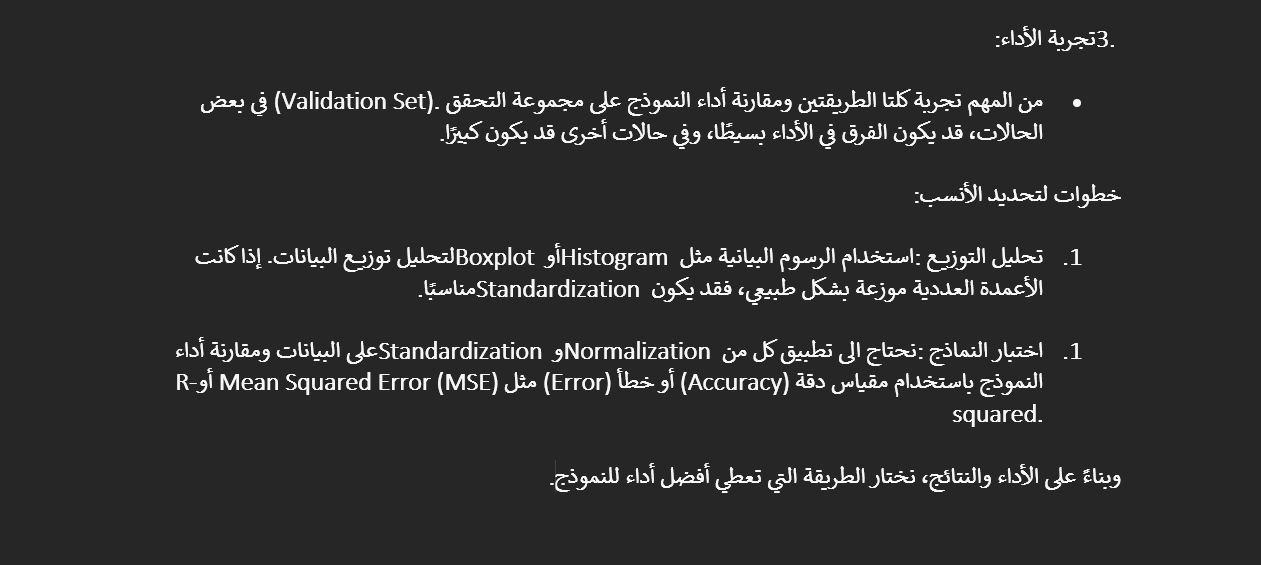

In [86]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # رسم Histogram
# for column in ['car_prices_in_rupee', 'kms_driven', 'manufacture', 'engine', 'Seats']:
#     plt.figure()
#     sns.histplot(data[column], kde=True)
#     plt.title(f'Distribution of {column}')
# plt.show()


##### أسعار السيارات. هذه القيم يمكن أن تتراوح بين قيم صغيرة وكبيرة، وقد تحتوي على قيم متطرفة.
##### المسافة المقطوعة بالسيارة. هذه القيم يمكن أن تتراوح بين قيم صغيرة وكبيرة، وقد تحتوي على قيم متطرفة.
##### سنة التصنيع. هذه القيم محدودة النطاق (عادة بين 1900 و2023)، وقد تكون موزعة بشكل متساو.
##### .حجم المحرك. هذه القيم يمكن أن تتراوح بين قيم صغيرة وكبيرة، وقد تحتوي على قيم متطرفة.
##### .عدد المقاعد. هذه القيم محدودة النطاق (عادة بين 2 و9)، وقد تكون موزعة بشكل متساو.
##### وبقية الاعمدة تم تشفيرها بالفعل



##### بعدما تم تنظيف البيانات وتحضيرها بحيث تم :
##### تحويل القيم النصية إلى قيم عددية (تم تنظيفها بالفعل).
##### تشفير الأعمدة الفئوية.
##### تطبيع الاعمدة العددية.
##### ب استخدام Normalization وStandardization
##### تقسيم البيانات إلى Features و.Target
#### الآن سوف ننتقل الى الخطوة التالية والتي هي تجهيز البيانات ل تدريب الموديل وتقسيمها

##### تقسيم البيانات إلى مجموعة تدريب واختبار

In [87]:
# سنستخدم train_test_split من مكتبة sklearn لتقسيم البيانات
from sklearn.model_selection import train_test_split

# افتراض أن البيانات والهدف هما data و target
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42)

##### بناء نموذج MLP باستخدام Keras


In [88]:
# سنقوم ببناء نموذج بسيط مع عدد من الطبقات الكثيفة واستخدام دالة التنشيط ReLU للطبقات المخفية ودالة linear للطبقة الأخيرة للتنبؤ
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# إنشاء النموذج
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # الطبقة الأولى
    Dense(32, activation='relu'),  # الطبقة الثانية
    Dense(1, activation='linear')  # الطبقة الأخيرة (للتنبؤ بالقيمة)
])

# تجميع النموذج
model.compile(optimizer='adam', loss='mse', metrics=['mae'])




c:\Users\Ali\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [89]:
import numpy as np

print(f"X_train type: {type(X_train)}, dtypes: \n{X_train.dtypes}")
print(f"X_test type: {type(X_test)}, dtypes: \n{X_test.dtypes}")
print(f"y_train type: {type(y_train)}, dtype: {y_train.dtype if isinstance(y_train, np.ndarray) else 'N/A'}")
print(f"y_test type: {type(y_test)}, dtype: {y_test.dtype if isinstance(y_test, np.ndarray) else 'N/A'}")

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

X_train type: <class 'pandas.core.frame.DataFrame'>, dtypes: 
car_prices_in_rupee       float64
kms_driven                float64
manufacture               float64
engine                    float64
Seats                     float64
fuel_type_Cng             float64
fuel_type_Diesel          float64
fuel_type_Electric        float64
fuel_type_Lpg             float64
fuel_type_Petrol          float64
transmission_Automatic    float64
transmission_Manual       float64
ownership_0th Owner       float64
ownership_1st Owner       float64
ownership_2nd Owner       float64
ownership_3rd Owner       float64
ownership_4th Owner       float64
ownership_5th Owner       float64
dtype: object
X_test type: <class 'pandas.core.frame.DataFrame'>, dtypes: 
car_prices_in_rupee       float64
kms_driven                float64
manufacture               float64
engine                    float64
Seats                     float64
fuel_type_Cng             float64
fuel_type_Diesel          float64
fuel_type_Ele

In [90]:
print("Missing values in X_train:", np.isnan(X_train).sum())
print("Missing values in y_train:", np.isnan(y_train).sum())
y_train = np.array(y_train)
y_test = np.array(y_test)

Missing values in X_train: car_prices_in_rupee       0
kms_driven                0
manufacture               0
engine                    0
Seats                     0
fuel_type_Cng             0
fuel_type_Diesel          0
fuel_type_Electric        0
fuel_type_Lpg             0
fuel_type_Petrol          0
transmission_Automatic    0
transmission_Manual       0
ownership_0th Owner       0
ownership_1st Owner       0
ownership_2nd Owner       0
ownership_3rd Owner       0
ownership_4th Owner       0
ownership_5th Owner       0
dtype: int64
Missing values in y_train: 0


##### تدريب النموذج


In [91]:
# # تدريب النموذج
# # تحويل البيانات إلى النوع الصحيح
# X_train = X_train.astype('float32')
# X_test = X_test.astype('float32')
# y_train = y_train.astype('float32')
# y_test = y_test.astype('float32')

# # تدريب النموذج
# history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))


##### تقييم النموذج واستعراض منحنيات التعلم


In [92]:
# # سنقوم بتحليل الأداء باستخدام منحنيات التعلم (الخسارة والدقة)
# import matplotlib.pyplot as plt

# # استعراض منحنيات الخسارة
# plt.plot(history.history['loss'], label='train loss')
# plt.plot(history.history['val_loss'], label='validation loss')
# plt.legend()
# plt.title('Loss Curve')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.show()

# # استعراض منحنيات الدقة (إذا كنت تستخدمها)
# plt.plot(history.history['mae'], label='train mae')
# plt.plot(history.history['val_mae'], label='validation mae')
# plt.legend()
# plt.title('MAE Curve')
# plt.xlabel('Epochs')
# plt.ylabel('Mean Absolute Error')
# plt.show()


Epoch 1/50


c:\Users\Ali\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 2/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 3/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 4/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 5/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 6/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 7/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 8/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 9/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 10/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

c:\Users\Ali\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 2/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 3/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 4/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 5/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 6/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 7/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 8/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 9/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 10/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - lo

c:\Users\Ali\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 2/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 3/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 4/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 5/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 6/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 7/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 8/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 9/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 10/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - lo

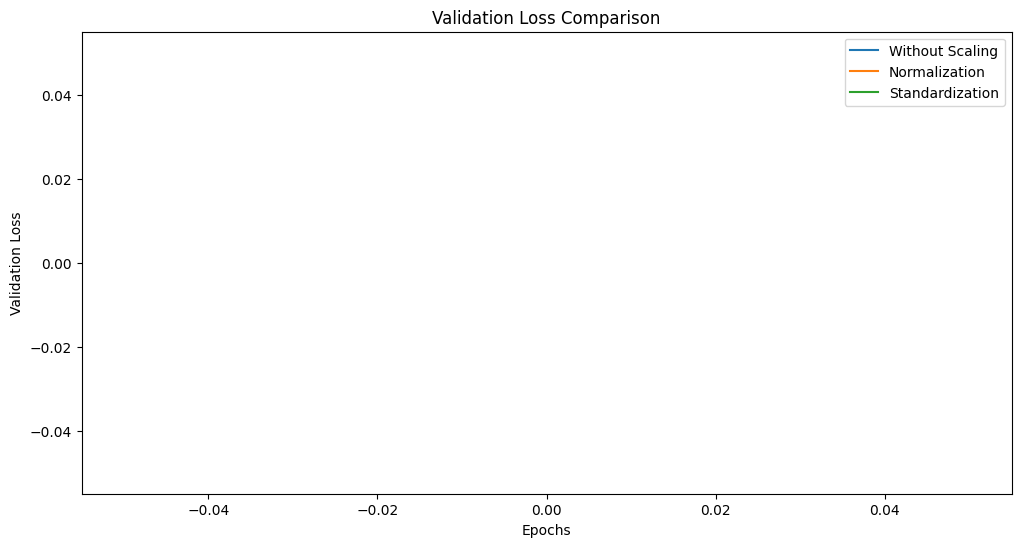

In [93]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# قراءة البيانات
data = pd.read_excel("processed_dataset.xlsx")  # ضع اسم ملفك هنا

# فصل البيانات إلى ميزات وهدف
X = data.drop(columns=["car_prices_in_rupee"])  # الميزات
y = data["car_prices_in_rupee"]  # الهدف

# تحويل البيانات إلى نوع float لتجنب الأخطاء
X = X.astype(float)
y = y.astype(float)

# تقسيم البيانات إلى تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# تعريف النموذج بدون أي تحسينات
def build_model():
    model = Sequential([
        Dense(64, input_dim=X_train.shape[1], activation='relu'),
        Dense(32, activation='relu'),
        Dense(1)  # مخرج واحد للتنبؤ
    ])
    model.compile(optimizer='sgd', loss='mse', metrics=['mae'])  # استخدام SGD دون تحسينات
    return model

# التجربة الأولى: بدون تطبيع
model1 = build_model()
history1 = model1.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# التجربة الثانية: بعد التطبيع
scaler_norm = MinMaxScaler()
X_train_norm = scaler_norm.fit_transform(X_train)
X_test_norm = scaler_norm.transform(X_test)

model2 = build_model()
history2 = model2.fit(X_train_norm, y_train, epochs=50, batch_size=16, validation_data=(X_test_norm, y_test), verbose=1)

# التجربة الثالثة: بعد التوحيد القياسي
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std = scaler_std.transform(X_test)

model3 = build_model()
history3 = model3.fit(X_train_std, y_train, epochs=50, batch_size=16, validation_data=(X_test_std, y_test), verbose=1)

# مقارنة الأداء
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history1.history['val_loss'], label='Without Scaling')
plt.plot(history2.history['val_loss'], label='Normalization')
plt.plot(history3.history['val_loss'], label='Standardization')
plt.title('Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

Epoch 1/50


c:\Users\Ali\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


276/276 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 146664768.0000 - mae: 3520.1980 - val_loss: 106516264.0000 - val_mae: 4079.2107
Epoch 2/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 141069632.0000 - mae: 3546.9204 - val_loss: 110378232.0000 - val_mae: 2114.5168
Epoch 3/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 142624512.0000 - mae: 3582.0195 - val_loss: 108922200.0000 - val_mae: 4600.0967
Epoch 4/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 136130976.0000 - mae: 3659.2529 - val_loss: 103968480.0000 - val_mae: 3315.9067
Epoch 5/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 133655336.0000 - mae: 3317.9631 - val_loss: 103986976.0000 - val_mae: 2101.7986
Epoch 6/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 131128880.0000 - mae: 3066.0203 - val_loss: 105390688.0000 - val_mae: 3830.4312
Epoch 7/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 119427248.0000 - mae: 2893.0151 - val_loss: 104293032.0000 - val_mae: 1977.2960
Epoch 8/50
276/276 ━━━━━━━━━━━━

c:\Users\Ali\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


276/276 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 115316496.0000 - mae: 1500.2140 - val_loss: 105376856.0000 - val_mae: 1419.3456
Epoch 2/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 160529504.0000 - mae: 2288.3030 - val_loss: 104249352.0000 - val_mae: 1970.7902
Epoch 3/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 134961152.0000 - mae: 2520.6729 - val_loss: 103548248.0000 - val_mae: 2485.1968
Epoch 4/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 152280320.0000 - mae: 3277.4280 - val_loss: 103075560.0000 - val_mae: 2681.9011
Epoch 5/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 134693776.0000 - mae: 3187.9346 - val_loss: 102621648.0000 - val_mae: 2766.6804
Epoch 6/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 148313280.0000 - mae: 3376.2402 - val_loss: 102215728.0000 - val_mae: 2836.9019
Epoch 7/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 127146888.0000 - mae: 3200.5322 - val_loss: 101811504.0000 - val_mae: 2852.1492
Epoch 8/50
276/276 ━━━━━━━━━━━━

c:\Users\Ali\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 121360656.0000 - mae: 1572.9740 - val_loss: 105510120.0000 - val_mae: 1322.8834
Epoch 2/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 144523152.0000 - mae: 1911.1035 - val_loss: 103819152.0000 - val_mae: 1518.9900
Epoch 3/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 143645152.0000 - mae: 2121.4604 - val_loss: 100613712.0000 - val_mae: 1954.2706
Epoch 4/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 135878752.0000 - mae: 2559.2393 - val_loss: 98017432.0000 - val_mae: 2428.9421
Epoch 5/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 124204224.0000 - mae: 2900.7014 - val_loss: 96623144.0000 - val_mae: 2799.4429
Epoch 6/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 152371136.0000 - mae: 3641.8474 - val_loss: 95901096.0000 - val_mae: 2990.8235
Epoch 7/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 99286352.0000 - mae: 3027.2339 - val_loss: 95365096.0000 - val_mae: 3117.3391
Epoch 8/50
276/276 ━━━━━━━━━━━━━━━━━

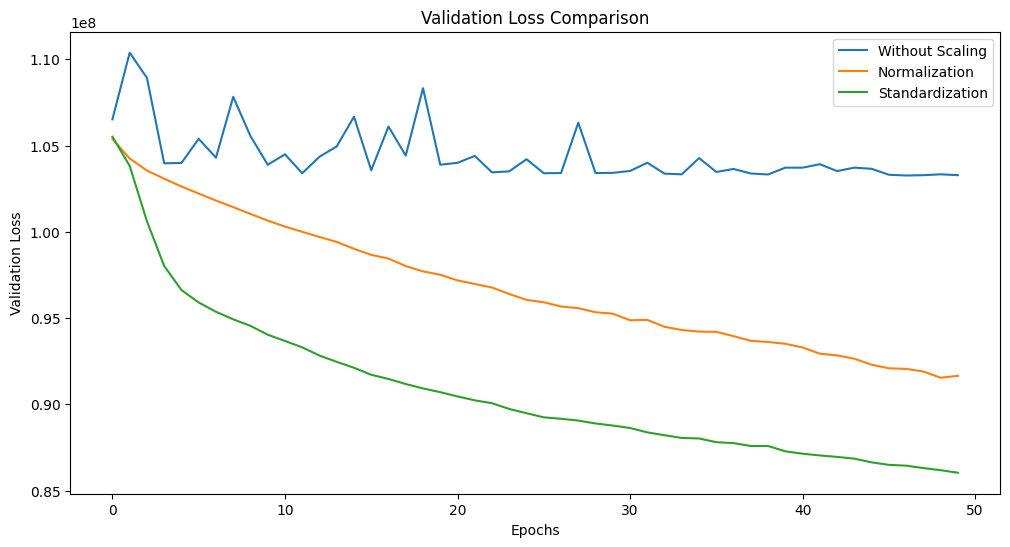

In [94]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# قراءة البيانات
data = pd.read_excel("processed_dataset.xlsx")  # ضع اسم ملفك هنا

# فصل البيانات إلى ميزات وهدف
X = data.drop(columns=["car_prices_in_rupee"])  # الميزات
y = data["car_prices_in_rupee"]  # الهدف

# تقسيم البيانات إلى تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# تعريف النموذج
def build_model():
    model = Sequential([
        Dense(64, input_dim=X_train.shape[1], activation='relu'),
        Dense(32, activation='relu'),
        Dense(1)  # مخرج واحد للتنبؤ
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

# التجربة الأولى: بدون تطبيع
model1 = build_model()
history1 = model1.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# التجربة الثانية: بعد التطبيع
scaler_norm = MinMaxScaler()
X_train_norm = scaler_norm.fit_transform(X_train)
X_test_norm = scaler_norm.transform(X_test)

model2 = build_model()
history2 = model2.fit(X_train_norm, y_train, epochs=50, batch_size=16, validation_data=(X_test_norm, y_test), verbose=1)

# التجربة الثالثة: بعد التوحيد القياسي
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std = scaler_std.transform(X_test)

model3 = build_model()
history3 = model3.fit(X_train_std, y_train, epochs=50, batch_size=16, validation_data=(X_test_std, y_test), verbose=1)


# مقارنة الأداء
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history1.history['val_loss'], label='Without Scaling')
plt.plot(history2.history['val_loss'], label='Normalization')
plt.plot(history3.history['val_loss'], label='Standardization')
plt.title('Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

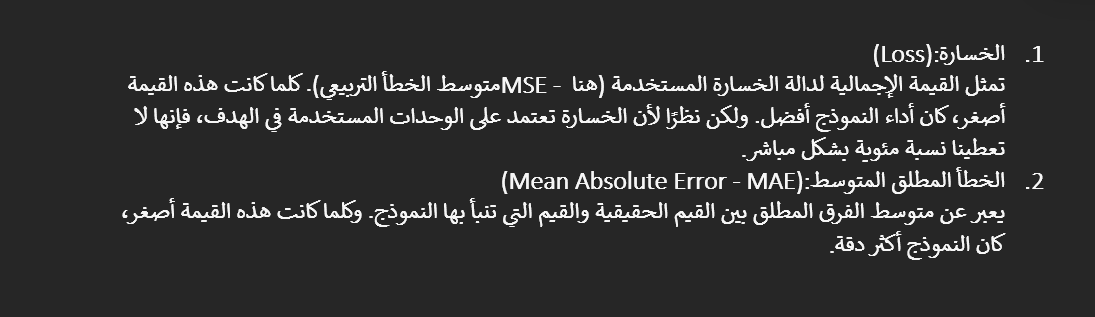
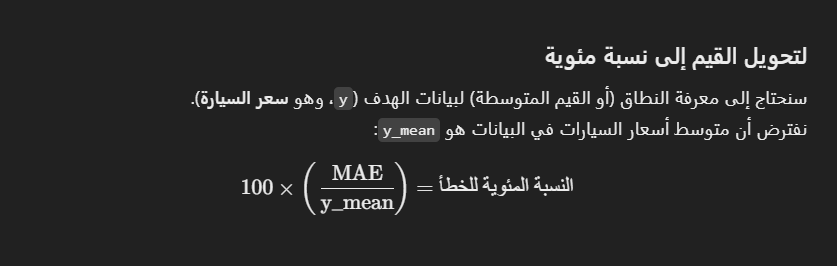

In [95]:
# حساب متوسط سعر السيارة
y_mean = y.mean()
print(f"Average Car Price: {y_mean}")

# حساب القيم النهائية للتجارب الثلاث
final_loss_1, final_mae_1 = model1.evaluate(X_test, y_test, verbose=0)
final_loss_2, final_mae_2 = model2.evaluate(X_test_norm, y_test, verbose=0)
final_loss_3, final_mae_3 = model3.evaluate(X_test_std, y_test, verbose=0)

# حساب الخطأ كنسبة مئوية لكل نموذج
mae_percent_1 = (final_mae_1 / y_mean) * 100
mae_percent_2 = (final_mae_2 / y_mean) * 100
mae_percent_3 = (final_mae_3 / y_mean) * 100

# عرض النتائج
print("Model 1 (Without Scaling):")
print(f"Final Loss: {final_loss_1}, Final MAE: {final_mae_1} ({mae_percent_1:.2f}%)\n")

print("Model 2 (Normalization):")
print(f"Final Loss: {final_loss_2}, Final MAE: {final_mae_2} ({mae_percent_2:.2f}%)\n")

print("Model 3 (Standardization):")
print(f"Final Loss: {final_loss_3}, Final MAE: {final_mae_3} ({mae_percent_3:.2f}%)\n")

Average Car Price: 1702.489900217707
Model 1 (Without Scaling):
Final Loss: 103280816.0, Final MAE: 2696.6103515625 (158.39%)

Model 2 (Normalization):
Final Loss: 91649080.0, Final MAE: 2835.369140625 (166.54%)

Model 3 (Standardization):
Final Loss: 86034488.0, Final MAE: 2711.00537109375 (159.24%)



Epoch 1/50


c:\Users\Ali\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


276/276 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 167003520.0000 - mae: 4241.0596 - val_loss: 103744272.0000 - val_mae: 3114.9963
Epoch 2/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 139887440.0000 - mae: 3399.3342 - val_loss: 103366400.0000 - val_mae: 2822.5032
Epoch 3/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 127387376.0000 - mae: 2990.7134 - val_loss: 106404632.0000 - val_mae: 3985.2366
Epoch 4/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 140868912.0000 - mae: 3365.2073 - val_loss: 103360120.0000 - val_mae: 2327.1604
Epoch 5/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 153210816.0000 - mae: 3348.3049 - val_loss: 103914488.0000 - val_mae: 3216.0247
Epoch 6/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 132806672.0000 - mae: 3074.3779 - val_loss: 103904456.0000 - val_mae: 1946.4537
Epoch 7/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 133548880.0000 - mae: 2981.0718 - val_loss: 103551440.0000 - val_mae: 2997.2942
Epoch 8/50
276/276 ━━━━━━━━━━━━

c:\Users\Ali\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


276/276 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 156605008.0000 - mae: 2040.9766 - val_loss: 105239176.0000 - val_mae: 1479.1399
Epoch 2/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 146259280.0000 - mae: 2333.2256 - val_loss: 103548072.0000 - val_mae: 2497.2585
Epoch 3/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 141302320.0000 - mae: 3347.7017 - val_loss: 102871416.0000 - val_mae: 2879.4304
Epoch 4/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 132452344.0000 - mae: 3279.5244 - val_loss: 102405856.0000 - val_mae: 3044.4255
Epoch 5/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 126433928.0000 - mae: 3449.6318 - val_loss: 101791768.0000 - val_mae: 3003.9004
Epoch 6/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 138965408.0000 - mae: 3600.9521 - val_loss: 101280120.0000 - val_mae: 3022.5496
Epoch 7/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 127874136.0000 - mae: 3373.7952 - val_loss: 100669848.0000 - val_mae: 2967.9883
Epoch 8/50
276/276 ━━━━━━━━━━━━

c:\Users\Ali\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


276/276 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 154719072.0000 - mae: 2021.2761 - val_loss: 105087808.0000 - val_mae: 1369.3705
Epoch 2/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 125074464.0000 - mae: 1937.7067 - val_loss: 97327336.0000 - val_mae: 2602.4353
Epoch 3/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 131139144.0000 - mae: 3439.9944 - val_loss: 95187680.0000 - val_mae: 3254.5740
Epoch 4/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 98568440.0000 - mae: 3292.0981 - val_loss: 94370696.0000 - val_mae: 3423.3503
Epoch 5/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 147314096.0000 - mae: 4234.6069 - val_loss: 93012896.0000 - val_mae: 3289.1501
Epoch 6/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 120689688.0000 - mae: 3720.6123 - val_loss: 91928624.0000 - val_mae: 3186.3838
Epoch 7/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 112325040.0000 - mae: 3485.6011 - val_loss: 91051448.0000 - val_mae: 3148.6511
Epoch 8/50
276/276 ━━━━━━━━━━━━━━━━━━━

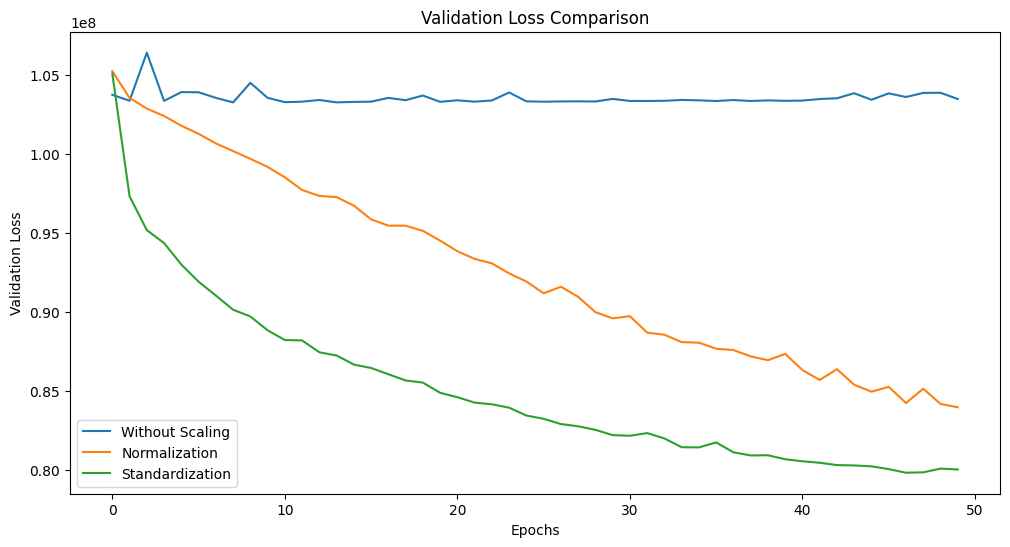

In [96]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# قراءة البيانات
data = pd.read_excel("processed_dataset.xlsx")  # ضع اسم ملفك هنا

# فصل البيانات إلى ميزات وهدف
X = data.drop(columns=["car_prices_in_rupee"])  # الميزات
y = data["car_prices_in_rupee"]  # الهدف

# تقسيم البيانات إلى تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# تعريف النموذج
def build_model():
    model = Sequential([
        Dense(18, input_dim=X_train.shape[1], activation='relu'),
        Dense(36, activation='relu'),
        Dense(36, activation='relu'),
        Dense(1)  # مخرج واحد للتنبؤ
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

# التجربة الأولى: بدون تطبيع
model1 = build_model()
history1 = model1.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# التجربة الثانية: بعد التطبيع
scaler_norm = MinMaxScaler()
X_train_norm = scaler_norm.fit_transform(X_train)
X_test_norm = scaler_norm.transform(X_test)

model2 = build_model()
history2 = model2.fit(X_train_norm, y_train, epochs=50, batch_size=16, validation_data=(X_test_norm, y_test), verbose=1)

# التجربة الثالثة: بعد التوحيد القياسي
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std = scaler_std.transform(X_test)

model3 = build_model()
history3 = model3.fit(X_train_std, y_train, epochs=50, batch_size=16, validation_data=(X_test_std, y_test), verbose=1)

# مقارنة الأداء
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history1.history['val_loss'], label='Without Scaling')
plt.plot(history2.history['val_loss'], label='Normalization')
plt.plot(history3.history['val_loss'], label='Standardization')
plt.title('Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()


In [97]:
# حساب متوسط سعر السيارة
y_mean = y.mean()
print(f"Average Car Price: {y_mean}")

# حساب القيم النهائية للتجارب الثلاث
final_loss_1, final_mae_1 = model1.evaluate(X_test, y_test, verbose=0)
final_loss_2, final_mae_2 = model2.evaluate(X_test_norm, y_test, verbose=0)
final_loss_3, final_mae_3 = model3.evaluate(X_test_std, y_test, verbose=0)

# حساب الخطأ كنسبة مئوية لكل نموذج
mae_percent_1 = (final_mae_1 / y_mean) * 100
mae_percent_2 = (final_mae_2 / y_mean) * 100
mae_percent_3 = (final_mae_3 / y_mean) * 100

# عرض النتائج
print("Model 1 (Without Scaling):")
print(f"Final Loss: {final_loss_1}, Final MAE: {final_mae_1} ({mae_percent_1:.2f}%)\n")

print("Model 2 (Normalization):")
print(f"Final Loss: {final_loss_2}, Final MAE: {final_mae_2} ({mae_percent_2:.2f}%)\n")

print("Model 3 (Standardization):")
print(f"Final Loss: {final_loss_3}, Final MAE: {final_mae_3} ({mae_percent_3:.2f}%)\n")


Average Car Price: 1702.489900217707
Model 1 (Without Scaling):
Final Loss: 103478152.0, Final MAE: 2393.981689453125 (140.62%)

Model 2 (Normalization):
Final Loss: 83984952.0, Final MAE: 2347.058837890625 (137.86%)

Model 3 (Standardization):
Final Loss: 80053936.0, Final MAE: 2317.464599609375 (136.12%)



Epoch 1/50


c:\Users\Ali\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


276/276 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 145254832.0000 - mae: 3347.9932 - val_loss: 105949136.0000 - val_mae: 3898.9478
Epoch 2/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 162791168.0000 - mae: 3676.5330 - val_loss: 104883040.0000 - val_mae: 1614.2153
Epoch 3/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 148958672.0000 - mae: 3372.2180 - val_loss: 103303912.0000 - val_mae: 2683.3308
Epoch 4/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 128379120.0000 - mae: 3112.2476 - val_loss: 104501448.0000 - val_mae: 1833.9142
Epoch 5/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 157969504.0000 - mae: 3574.1714 - val_loss: 104072968.0000 - val_mae: 3379.0811
Epoch 6/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 147731328.0000 - mae: 3710.9861 - val_loss: 111313944.0000 - val_mae: 2234.5007
Epoch 7/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 157613808.0000 - mae: 3637.2080 - val_loss: 109594304.0000 - val_mae: 4699.7261
Epoch 8/50
276/276 ━━━━━━━━━━━━

c:\Users\Ali\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 134684080.0000 - mae: 1754.5602 - val_loss: 105587112.0000 - val_mae: 1341.4010
Epoch 2/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 130688000.0000 - mae: 1767.7120 - val_loss: 104747488.0000 - val_mae: 1707.3804
Epoch 3/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 138610256.0000 - mae: 2341.4258 - val_loss: 103848208.0000 - val_mae: 2259.6079
Epoch 4/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 146370064.0000 - mae: 2904.1243 - val_loss: 103373760.0000 - val_mae: 2570.8574
Epoch 5/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 142297984.0000 - mae: 3251.7651 - val_loss: 102979648.0000 - val_mae: 2744.8445
Epoch 6/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 154222912.0000 - mae: 3499.0134 - val_loss: 102567968.0000 - val_mae: 2757.6235
Epoch 7/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 131849240.0000 - mae: 3222.7200 - val_loss: 102205056.0000 - val_mae: 2828.1992
Epoch 8/50
276/276 ━━━━━━━━━━━━

c:\Users\Ali\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


276/276 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 168943808.0000 - mae: 2093.4514 - val_loss: 105579720.0000 - val_mae: 1315.5541
Epoch 2/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 135421360.0000 - mae: 1818.5507 - val_loss: 104128608.0000 - val_mae: 1479.6598
Epoch 3/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 143649264.0000 - mae: 2197.9868 - val_loss: 101013064.0000 - val_mae: 1885.2538
Epoch 4/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 140029232.0000 - mae: 2502.8083 - val_loss: 98128848.0000 - val_mae: 2389.8892
Epoch 5/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 122487032.0000 - mae: 2866.2229 - val_loss: 96570344.0000 - val_mae: 2771.9473
Epoch 6/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 127529848.0000 - mae: 3333.2900 - val_loss: 95683760.0000 - val_mae: 2997.4036
Epoch 7/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 135606656.0000 - mae: 3551.2551 - val_loss: 95028808.0000 - val_mae: 3097.3228
Epoch 8/50
276/276 ━━━━━━━━━━━━━━━━

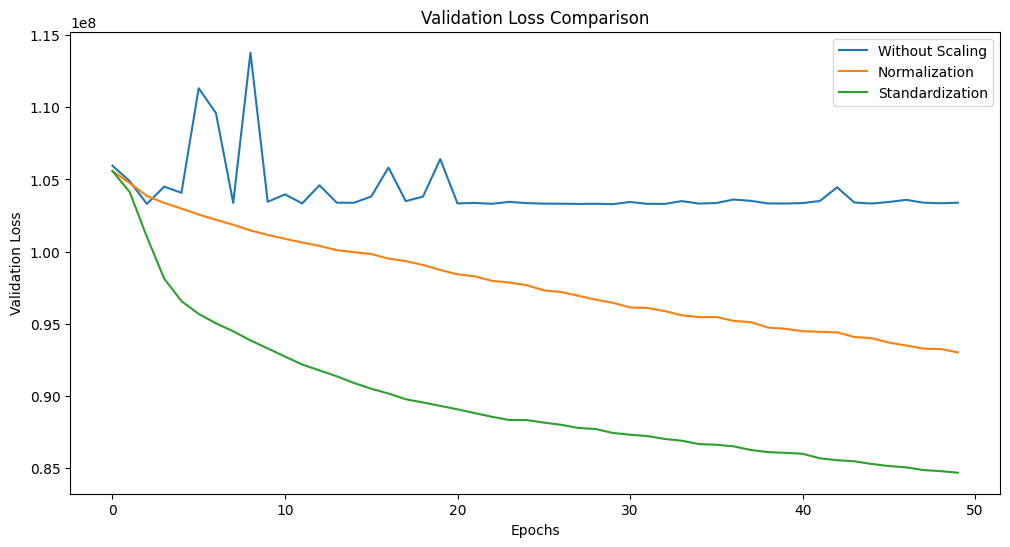

In [98]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# قراءة البيانات
data = pd.read_excel("processed_dataset.xlsx")  # ضع اسم ملفك هنا

# فصل البيانات إلى ميزات وهدف
X = data.drop(columns=["car_prices_in_rupee"])  # الميزات
y = data["car_prices_in_rupee"]  # الهدف

# تقسيم البيانات إلى تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# تعريف النموذج
def build_model():
    model = Sequential([
        Dense(64, input_dim=X_train.shape[1], activation='relu'),
        Dense(32, activation='relu'),
        Dense(1)  # مخرج واحد للتنبؤ
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

# التجربة الأولى: بدون تطبيع
model1 = build_model()
history1 = model1.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# التجربة الثانية: بعد التطبيع
scaler_norm = MinMaxScaler()
X_train_norm = scaler_norm.fit_transform(X_train)
X_test_norm = scaler_norm.transform(X_test)

model2 = build_model()
history2 = model2.fit(X_train_norm, y_train, epochs=50, batch_size=16, validation_data=(X_test_norm, y_test), verbose=1)

# التجربة الثالثة: بعد التوحيد القياسي
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std = scaler_std.transform(X_test)

model3 = build_model()
history3 = model3.fit(X_train_std, y_train, epochs=50, batch_size=16, validation_data=(X_test_std, y_test), verbose=1)

# مقارنة الأداء
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history1.history['val_loss'], label='Without Scaling')
plt.plot(history2.history['val_loss'], label='Normalization')
plt.plot(history3.history['val_loss'], label='Standardization')
plt.title('Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()


In [99]:
# حساب متوسط سعر السيارة
y_mean = y.mean()
print(f"Average Car Price: {y_mean}")

# حساب القيم النهائية للتجارب الثلاث
final_loss_1, final_mae_1 = model1.evaluate(X_test, y_test, verbose=0)
final_loss_2, final_mae_2 = model2.evaluate(X_test_norm, y_test, verbose=0)
final_loss_3, final_mae_3 = model3.evaluate(X_test_std, y_test, verbose=0)

# حساب الخطأ كنسبة مئوية لكل نموذج
mae_percent_1 = (final_mae_1 / y_mean) * 100
mae_percent_2 = (final_mae_2 / y_mean) * 100
mae_percent_3 = (final_mae_3 / y_mean) * 100

# عرض النتائج
print("Model 1 (Without Scaling):")
print(f"Final Loss: {final_loss_1}, Final MAE: {final_mae_1} ({mae_percent_1:.2f}%)\n")

print("Model 2 (Normalization):")
print(f"Final Loss: {final_loss_2}, Final MAE: {final_mae_2} ({mae_percent_2:.2f}%)\n")

print("Model 3 (Standardization):")
print(f"Final Loss: {final_loss_3}, Final MAE: {final_mae_3} ({mae_percent_3:.2f}%)\n")


Average Car Price: 1702.489900217707
Model 1 (Without Scaling):
Final Loss: 103385224.0, Final MAE: 2611.9912109375 (153.42%)

Model 2 (Normalization):
Final Loss: 93017952.0, Final MAE: 2862.2470703125 (168.12%)

Model 3 (Standardization):
Final Loss: 84681440.0, Final MAE: 2656.123779296875 (156.01%)



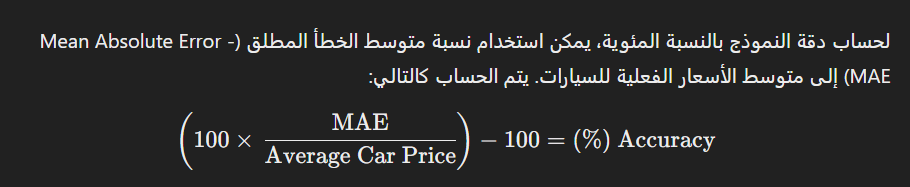
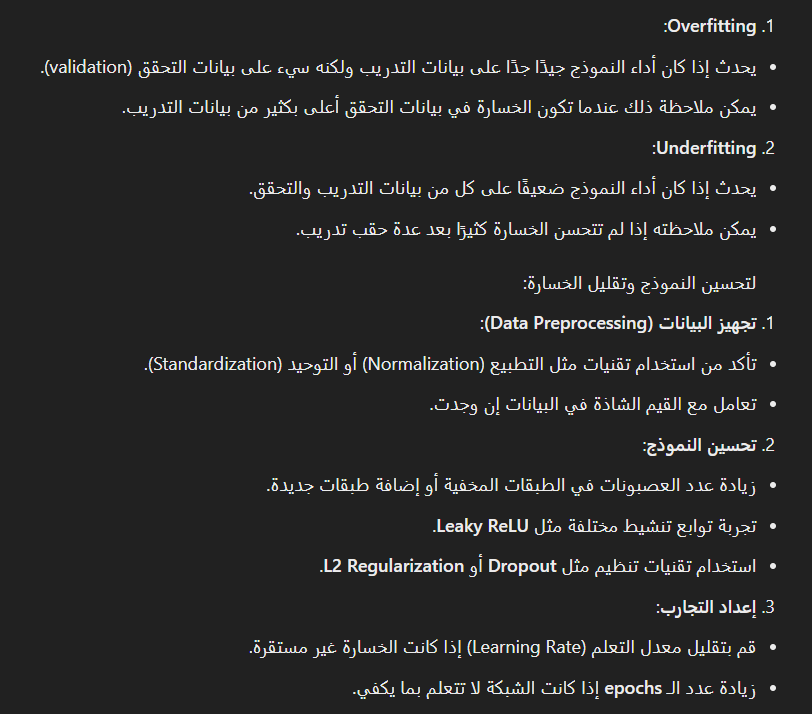

Epoch 1/50


c:\Users\Ali\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Ali\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


276/276 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 136576944.0000 - mae: 3287.5615 - val_loss: 105203992.0000 - val_mae: 3659.0535
Epoch 2/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 137311168.0000 - mae: 3445.6584 - val_loss: 103268552.0000 - val_mae: 2568.4319
Epoch 3/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 134624880.0000 - mae: 3036.2991 - val_loss: 104410856.0000 - val_mae: 3418.5027
Epoch 4/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 142902080.0000 - mae: 3281.8760 - val_loss: 103881192.0000 - val_mae: 3194.1338
Epoch 5/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 157695936.0000 - mae: 3482.5212 - val_loss: 103272456.0000 - val_mae: 2520.6853
Epoch 6/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 144216336.0000 - mae: 3206.5247 - val_loss: 103271224.0000 - val_mae: 2611.5234
Epoch 7/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 137321520.0000 - mae: 3176.7720 - val_loss: 103384528.0000 - val_mae: 2842.4907
Epoch 8/50
276/276 ━━━━━━━━━━━━

c:\Users\Ali\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Ali\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


276/276 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 149055968.0000 - mae: 1976.1227 - val_loss: 103816336.0000 - val_mae: 2253.8645
Epoch 2/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 149911056.0000 - mae: 3221.5437 - val_loss: 102308176.0000 - val_mae: 2858.0872
Epoch 3/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 143475168.0000 - mae: 3581.0776 - val_loss: 100960376.0000 - val_mae: 2864.8953
Epoch 4/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 126893376.0000 - mae: 3200.1724 - val_loss: 100176608.0000 - val_mae: 3047.7537
Epoch 5/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 114865832.0000 - mae: 3090.4224 - val_loss: 98946800.0000 - val_mae: 2976.2842
Epoch 6/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 119003848.0000 - mae: 3159.6738 - val_loss: 97665696.0000 - val_mae: 2934.3464
Epoch 7/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 132651544.0000 - mae: 3368.9731 - val_loss: 96308200.0000 - val_mae: 2736.8545
Epoch 8/50
276/276 ━━━━━━━━━━━━━━━

c:\Users\Ali\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Ali\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


276/276 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 128608040.0000 - mae: 1650.9696 - val_loss: 101331112.0000 - val_mae: 1847.7765
Epoch 2/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 147494864.0000 - mae: 3142.5212 - val_loss: 94677112.0000 - val_mae: 3272.2039
Epoch 3/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 136729312.0000 - mae: 3911.1848 - val_loss: 92183160.0000 - val_mae: 3113.9592
Epoch 4/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 117689544.0000 - mae: 3501.6614 - val_loss: 90730840.0000 - val_mae: 3137.4543
Epoch 5/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 98712512.0000 - mae: 3233.6143 - val_loss: 90210504.0000 - val_mae: 3225.1521
Epoch 6/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 111579536.0000 - mae: 3507.7354 - val_loss: 87746048.0000 - val_mae: 2793.2610
Epoch 7/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 108563848.0000 - mae: 3098.1128 - val_loss: 87055624.0000 - val_mae: 2788.2993
Epoch 8/50
276/276 ━━━━━━━━━━━━━━━━━━━

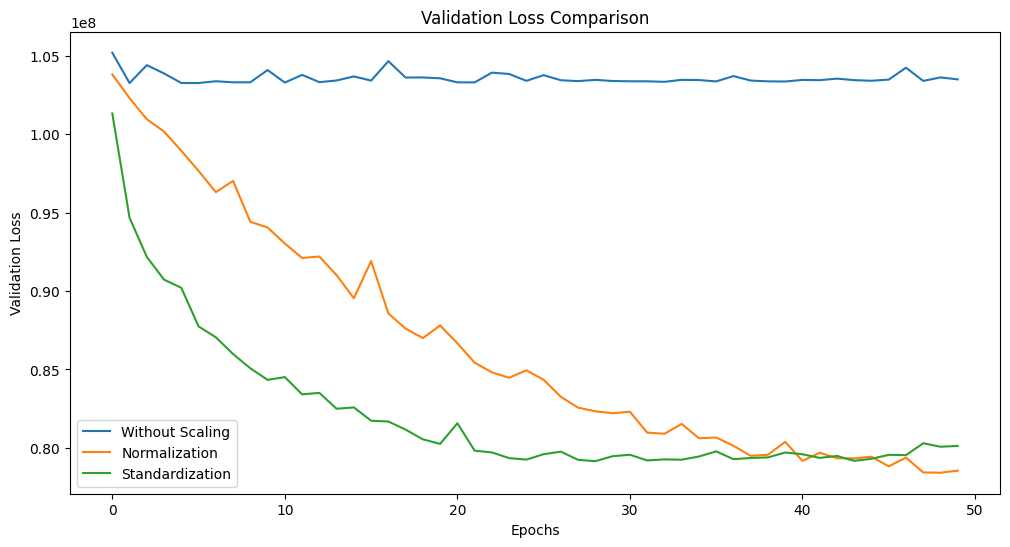

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LeakyReLU
from tensorflow.keras.optimizers import Adam
 

# قراءة البيانات
data = pd.read_excel("processed_dataset.xlsx")  # ضع اسم ملفك هنا

# فصل البيانات إلى ميزات وهدف
X = data.drop(columns=["car_prices_in_rupee"])  # الميزات
y = data["car_prices_in_rupee"]  # الهدف

# تقسيم البيانات إلى تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# تعريف النموذج
def build_model():
    model = Sequential([
        Dense(128, input_dim=X_train.shape[1]),
        LeakyReLU(alpha=0.1),
        Dense(64),
        LeakyReLU(alpha=0.1),
        Dense(32),
        LeakyReLU(alpha=0.1),
        Dense(1)  # مخرج واحد للتنبؤ
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

# التجربة الأولى: بدون تطبيع
model1 = build_model()
history1 = model1.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# التجربة الثانية: بعد التطبيع
scaler_norm = MinMaxScaler()
X_train_norm = scaler_norm.fit_transform(X_train)
X_test_norm = scaler_norm.transform(X_test)

model2 = build_model()
history2 = model2.fit(X_train_norm, y_train, epochs=50, batch_size=16, validation_data=(X_test_norm, y_test), verbose=1)

# التجربة الثالثة: بعد التوحيد القياسي
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std = scaler_std.transform(X_test)

model3 = build_model()
history3 = model3.fit(X_train_std, y_train, epochs=50, batch_size=16, validation_data=(X_test_std, y_test), verbose=1)

# مقارنة الأداء
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history1.history['val_loss'], label='Without Scaling')
plt.plot(history2.history['val_loss'], label='Normalization')
plt.plot(history3.history['val_loss'], label='Standardization')
plt.title('Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()


In [4]:
# حساب متوسط سعر السيارة
y_mean = y.mean()
print(f"Average Car Price: {y_mean}")

# حساب القيم النهائية للتجارب الثلاث
final_loss_1, final_mae_1 = model1.evaluate(X_test, y_test, verbose=0)
final_loss_2, final_mae_2 = model2.evaluate(X_test_norm, y_test, verbose=0)
final_loss_3, final_mae_3 = model3.evaluate(X_test_std, y_test, verbose=0)

# حساب الخطأ كنسبة مئوية لكل نموذج
mae_percent_1 = (final_mae_1 / y_mean) * 100
mae_percent_2 = (final_mae_2 / y_mean) * 100
mae_percent_3 = (final_mae_3 / y_mean) * 100

# عرض النتائج
print("Model 1 (Without Scaling):")
print(f"Final Loss: {final_loss_1}, Final MAE: {final_mae_1} ({mae_percent_1:.2f}%)\n")

print("Model 2 (Normalization):")
print(f"Final Loss: {final_loss_2}, Final MAE: {final_mae_2} ({mae_percent_2:.2f}%)\n")

print("Model 3 (Standardization):")
print(f"Final Loss: {final_loss_3}, Final MAE: {final_mae_3} ({mae_percent_3:.2f}%)\n")


Average Car Price: 1702.489900217707
Model 1 (Without Scaling):
Final Loss: 103438120.0, Final MAE: 2927.24462890625 (171.94%)

Model 2 (Normalization):
Final Loss: 79030080.0, Final MAE: 2082.374755859375 (122.31%)

Model 3 (Standardization):
Final Loss: 79002808.0, Final MAE: 1941.291748046875 (114.03%)



Epoch 1/50


c:\Users\Ali\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


276/276 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 130181016.0000 - mae: 3155.8125 - val_loss: 103842960.0000 - val_mae: 2000.4153
Epoch 2/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 134007920.0000 - mae: 3081.8184 - val_loss: 103392816.0000 - val_mae: 2874.7959
Epoch 3/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 130864824.0000 - mae: 3149.8647 - val_loss: 103606208.0000 - val_mae: 2182.8530
Epoch 4/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 125320136.0000 - mae: 2842.8254 - val_loss: 105838576.0000 - val_mae: 3903.9890
Epoch 5/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 130464600.0000 - mae: 3334.5288 - val_loss: 104411304.0000 - val_mae: 3477.8745
Epoch 6/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 128621472.0000 - mae: 3027.3140 - val_loss: 104889072.0000 - val_mae: 3649.5593
Epoch 7/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 136107424.0000 - mae: 3288.3855 - val_loss: 103334824.0000 - val_mae: 2741.9758
Epoch 8/50
276/276 ━━━━━━━━━━━━

c:\Users\Ali\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


276/276 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 132102000.0000 - mae: 1678.7357 - val_loss: 105723576.0000 - val_mae: 1303.4824
Epoch 2/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 136123392.0000 - mae: 1747.2170 - val_loss: 105700624.0000 - val_mae: 1304.6846
Epoch 3/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 119319888.0000 - mae: 1559.5389 - val_loss: 105623712.0000 - val_mae: 1327.8132
Epoch 4/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 133379128.0000 - mae: 1686.6819 - val_loss: 105445448.0000 - val_mae: 1395.3346
Epoch 5/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 132695296.0000 - mae: 1804.4646 - val_loss: 105145544.0000 - val_mae: 1520.3110
Epoch 6/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 153238192.0000 - mae: 2180.8506 - val_loss: 104798336.0000 - val_mae: 1681.9548
Epoch 7/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 152487408.0000 - mae: 2292.0837 - val_loss: 104441728.0000 - val_mae: 1873.5023
Epoch 8/50
276/276 ━━━━━━━━━━━━

c:\Users\Ali\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


276/276 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 120235320.0000 - mae: 1497.1080 - val_loss: 105726120.0000 - val_mae: 1305.1794
Epoch 2/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 146184976.0000 - mae: 1861.7322 - val_loss: 105717992.0000 - val_mae: 1304.2415
Epoch 3/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 153817664.0000 - mae: 1931.1432 - val_loss: 105696632.0000 - val_mae: 1304.2198
Epoch 4/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 127267640.0000 - mae: 1674.4470 - val_loss: 105636568.0000 - val_mae: 1308.7375
Epoch 5/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 156507504.0000 - mae: 1980.1370 - val_loss: 105501448.0000 - val_mae: 1323.1196
Epoch 6/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 164469728.0000 - mae: 2045.7616 - val_loss: 105241512.0000 - val_mae: 1352.2054
Epoch 7/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 128390856.0000 - mae: 1750.3878 - val_loss: 104797608.0000 - val_mae: 1402.5414
Epoch 8/50
276/276 ━━━━━━━━━━━━

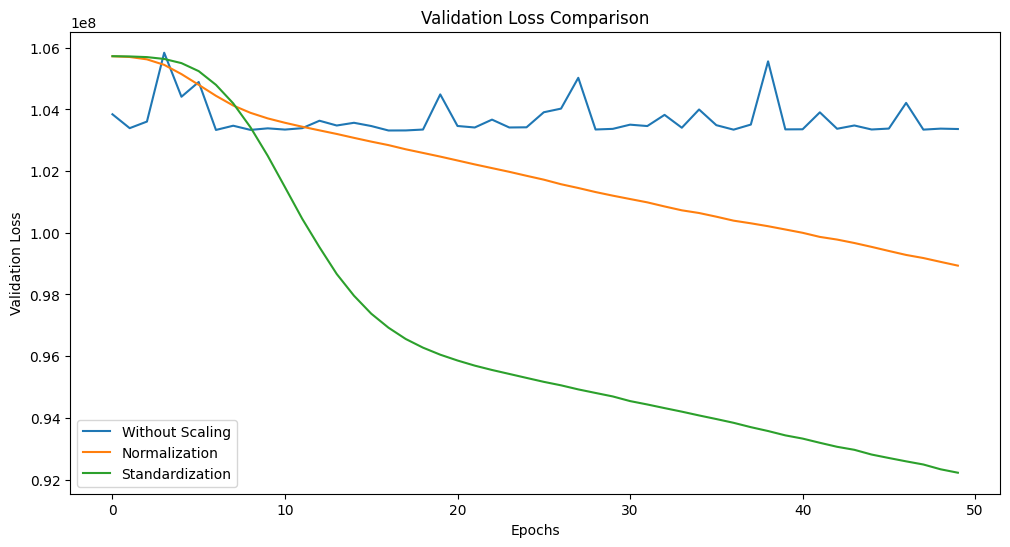

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
 

# قراءة البيانات
data = pd.read_excel("processed_dataset.xlsx")  # ضع اسم ملفك هنا

# فصل البيانات إلى ميزات وهدف
X = data.drop(columns=["car_prices_in_rupee"])  # الميزات
y = data["car_prices_in_rupee"]  # الهدف

# تقسيم البيانات إلى تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# تعريف النموذج
def build_model():
    model = Sequential([
        Dense(128, input_dim=X_train.shape[1], activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1)  # مخرج واحد للتنبؤ
    ])
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse', metrics=['mae'])
    return model

# التجربة الأولى: بدون تطبيع
model1 = build_model()
history1 = model1.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# التجربة الثانية: بعد التطبيع
scaler_norm = MinMaxScaler()
X_train_norm = scaler_norm.fit_transform(X_train)
X_test_norm = scaler_norm.transform(X_test)

model2 = build_model()
history2 = model2.fit(X_train_norm, y_train, epochs=50, batch_size=16, validation_data=(X_test_norm, y_test), verbose=1)

# التجربة الثالثة: بعد التوحيد القياسي
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std = scaler_std.transform(X_test)

model3 = build_model()
history3 = model3.fit(X_train_std, y_train, epochs=50, batch_size=16, validation_data=(X_test_std, y_test), verbose=1)

# مقارنة الأداء
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history1.history['val_loss'], label='Without Scaling')
plt.plot(history2.history['val_loss'], label='Normalization')
plt.plot(history3.history['val_loss'], label='Standardization')
plt.title('Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()


In [7]:
# حساب متوسط سعر السيارة
y_mean = y.mean()
print(f"Average Car Price: {y_mean}")

# حساب القيم النهائية للتجارب الثلاث
final_loss_1, final_mae_1 = model1.evaluate(X_test, y_test, verbose=0)
final_loss_2, final_mae_2 = model2.evaluate(X_test_norm, y_test, verbose=0)
final_loss_3, final_mae_3 = model3.evaluate(X_test_std, y_test, verbose=0)

# حساب الخطأ كنسبة مئوية لكل نموذج
mae_percent_1 = (final_mae_1 / y_mean) * 100
mae_percent_2 = (final_mae_2 / y_mean) * 100
mae_percent_3 = (final_mae_3 / y_mean) * 100

# عرض النتائج
print("Model 1 (Without Scaling):")
print(f"Final Loss: {final_loss_1}, Final MAE: {final_mae_1} ({mae_percent_1:.2f}%)\n")

print("Model 2 (Normalization):")
print(f"Final Loss: {final_loss_2}, Final MAE: {final_mae_2} ({mae_percent_2:.2f}%)\n")

print("Model 3 (Standardization):")
print(f"Final Loss: {final_loss_3}, Final MAE: {final_mae_3} ({mae_percent_3:.2f}%)\n")


Average Car Price: 1702.489900217707
Model 1 (Without Scaling):
Final Loss: 103365128.0, Final MAE: 2874.76025390625 (168.86%)

Model 2 (Normalization):
Final Loss: 98935840.0, Final MAE: 2862.0419921875 (168.11%)

Model 3 (Standardization):
Final Loss: 92221736.0, Final MAE: 3275.576904296875 (192.40%)



Epoch 1/50


c:\Users\Ali\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


276/276 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 145681792.0000 - mae: 3720.5352 - val_loss: 103975136.0000 - val_mae: 1854.7455
Epoch 2/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 137767984.0000 - mae: 2878.5273 - val_loss: 103332200.0000 - val_mae: 2306.5623
Epoch 3/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 154320896.0000 - mae: 3179.3542 - val_loss: 104286288.0000 - val_mae: 1730.4354
Epoch 4/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 163524896.0000 - mae: 3306.2310 - val_loss: 104143152.0000 - val_mae: 1789.5060
Epoch 5/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 136112880.0000 - mae: 2757.2437 - val_loss: 104335744.0000 - val_mae: 3374.7742
Epoch 6/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 137881728.0000 - mae: 3271.5811 - val_loss: 103723568.0000 - val_mae: 1991.3531
Epoch 7/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 127494672.0000 - mae: 2609.4299 - val_loss: 103562776.0000 - val_mae: 3001.6626
Epoch 8/50
276/276 ━━━━━━━━━━━━

c:\Users\Ali\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


276/276 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 146798320.0000 - mae: 1908.7352 - val_loss: 104003832.0000 - val_mae: 2137.5281
Epoch 2/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 161951856.0000 - mae: 3266.5154 - val_loss: 102355360.0000 - val_mae: 2784.2080
Epoch 3/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 130838272.0000 - mae: 3200.4519 - val_loss: 101107352.0000 - val_mae: 2910.8887
Epoch 4/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 121370200.0000 - mae: 3117.5754 - val_loss: 99653968.0000 - val_mae: 2724.9941
Epoch 5/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 146589904.0000 - mae: 3510.5090 - val_loss: 98197968.0000 - val_mae: 2552.0029
Epoch 6/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 143297024.0000 - mae: 3396.4331 - val_loss: 97007536.0000 - val_mae: 2384.5161
Epoch 7/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 133242512.0000 - mae: 3134.3809 - val_loss: 96209472.0000 - val_mae: 2534.5742
Epoch 8/50
276/276 ━━━━━━━━━━━━━━━━

c:\Users\Ali\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


276/276 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 135406944.0000 - mae: 1766.0267 - val_loss: 101038176.0000 - val_mae: 1947.5732
Epoch 2/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 125818976.0000 - mae: 2820.2102 - val_loss: 95019744.0000 - val_mae: 3183.1426
Epoch 3/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 135607392.0000 - mae: 3716.3347 - val_loss: 92318408.0000 - val_mae: 3084.5205
Epoch 4/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 122183416.0000 - mae: 3507.8733 - val_loss: 90485288.0000 - val_mae: 3006.5083
Epoch 5/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 127946296.0000 - mae: 3713.0593 - val_loss: 88909624.0000 - val_mae: 2860.4099
Epoch 6/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 110916712.0000 - mae: 3268.9021 - val_loss: 87629192.0000 - val_mae: 2646.8567
Epoch 7/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 96998856.0000 - mae: 2859.7188 - val_loss: 87620176.0000 - val_mae: 2838.4231
Epoch 8/50
276/276 ━━━━━━━━━━━━━━━━━━━

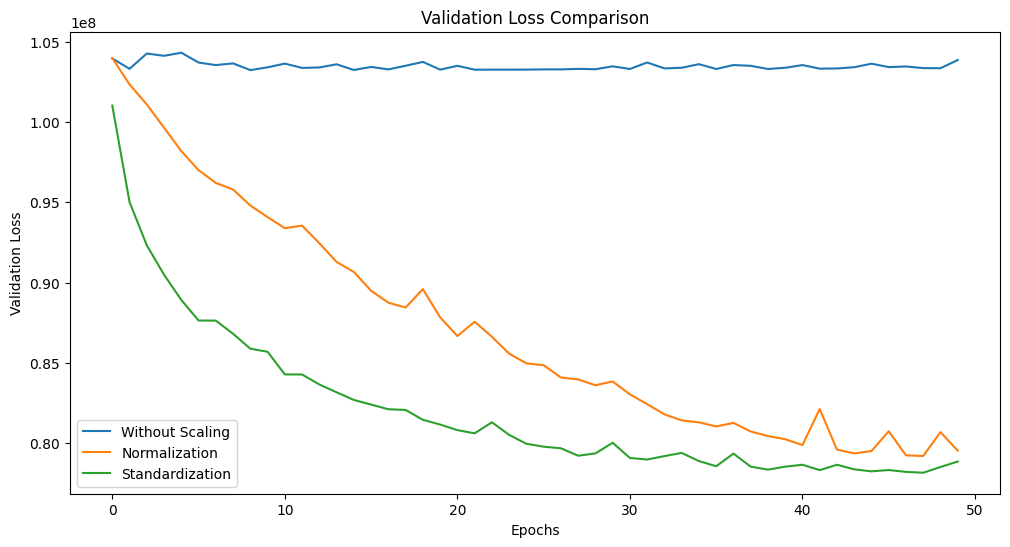

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
 

# قراءة البيانات
data = pd.read_excel("processed_dataset.xlsx")  # ضع اسم ملفك هنا

# فصل البيانات إلى ميزات وهدف
X = data.drop(columns=["car_prices_in_rupee"])  # الميزات
y = data["car_prices_in_rupee"]  # الهدف

# تقسيم البيانات إلى تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# تعريف النموذج
def build_model():
    model = Sequential([
        Dense(128, input_dim=X_train.shape[1], activation='relu'),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(1)  # مخرج واحد للتنبؤ
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

# التجربة الأولى: بدون تطبيع
model1 = build_model()
history1 = model1.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# التجربة الثانية: بعد التطبيع
scaler_norm = MinMaxScaler()
X_train_norm = scaler_norm.fit_transform(X_train)
X_test_norm = scaler_norm.transform(X_test)

model2 = build_model()
history2 = model2.fit(X_train_norm, y_train, epochs=50, batch_size=16, validation_data=(X_test_norm, y_test), verbose=1)

# التجربة الثالثة: بعد التوحيد القياسي
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std = scaler_std.transform(X_test)

model3 = build_model()
history3 = model3.fit(X_train_std, y_train, epochs=50, batch_size=16, validation_data=(X_test_std, y_test), verbose=1)

# مقارنة الأداء
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history1.history['val_loss'], label='Without Scaling')
plt.plot(history2.history['val_loss'], label='Normalization')
plt.plot(history3.history['val_loss'], label='Standardization')
plt.title('Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()


In [9]:
# حساب متوسط سعر السيارة
y_mean = y.mean()
print(f"Average Car Price: {y_mean}")

# حساب القيم النهائية للتجارب الثلاث
final_loss_1, final_mae_1 = model1.evaluate(X_test, y_test, verbose=0)
final_loss_2, final_mae_2 = model2.evaluate(X_test_norm, y_test, verbose=0)
final_loss_3, final_mae_3 = model3.evaluate(X_test_std, y_test, verbose=0)

# حساب الخطأ كنسبة مئوية لكل نموذج
mae_percent_1 = (final_mae_1 / y_mean) * 100
mae_percent_2 = (final_mae_2 / y_mean) * 100
mae_percent_3 = (final_mae_3 / y_mean) * 100

# عرض النتائج
print("Model 1 (Without Scaling):")
print(f"Final Loss: {final_loss_1}, Final MAE: {final_mae_1} ({mae_percent_1:.2f}%)\n")

print("Model 2 (Normalization):")
print(f"Final Loss: {final_loss_2}, Final MAE: {final_mae_2} ({mae_percent_2:.2f}%)\n")

print("Model 3 (Standardization):")
print(f"Final Loss: {final_loss_3}, Final MAE: {final_mae_3} ({mae_percent_3:.2f}%)\n")


Average Car Price: 1702.489900217707
Model 1 (Without Scaling):
Final Loss: 103881064.0, Final MAE: 2029.458984375 (119.21%)

Model 2 (Normalization):
Final Loss: 79507704.0, Final MAE: 2243.995849609375 (131.81%)

Model 3 (Standardization):
Final Loss: 78831472.0, Final MAE: 1914.575439453125 (112.46%)



Epoch 1/50


c:\Users\Ali\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Ali\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


138/138 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 153503184.0000 - mae: 4091.7886 - val_loss: 103478488.0000 - val_mae: 2382.5071
Epoch 2/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 149835616.0000 - mae: 3623.6636 - val_loss: 104378032.0000 - val_mae: 1839.6956
Epoch 3/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 138901904.0000 - mae: 3080.5793 - val_loss: 103610352.0000 - val_mae: 2410.6475
Epoch 4/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 179136544.0000 - mae: 4032.9219 - val_loss: 103646904.0000 - val_mae: 3077.6475
Epoch 5/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 146581808.0000 - mae: 3555.4863 - val_loss: 105679032.0000 - val_mae: 3809.5979
Epoch 6/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 154378496.0000 - mae: 3767.9211 - val_loss: 104203784.0000 - val_mae: 3377.1440
Epoch 7/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 155727792.0000 - mae: 3582.0322 - val_loss: 104287952.0000 - val_mae: 1833.7667
Epoch 8/50
138/138 ━━━━━━━━━━━━

c:\Users\Ali\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Ali\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


138/138 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 138003568.0000 - mae: 3305.2827 - val_loss: 106900824.0000 - val_mae: 4106.2495
Epoch 2/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 146021248.0000 - mae: 3455.5374 - val_loss: 103406000.0000 - val_mae: 2856.5977
Epoch 3/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 125028224.0000 - mae: 3153.0925 - val_loss: 103378544.0000 - val_mae: 2459.8306
Epoch 4/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 136117232.0000 - mae: 3407.8467 - val_loss: 103454424.0000 - val_mae: 2386.4631
Epoch 5/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 127486840.0000 - mae: 3024.8513 - val_loss: 103322016.0000 - val_mae: 2550.1482
Epoch 6/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 148881600.0000 - mae: 3395.6858 - val_loss: 103764400.0000 - val_mae: 3150.4219
Epoch 7/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 119025392.0000 - mae: 2806.1360 - val_loss: 103319928.0000 - val_mae: 2719.5410
Epoch 8/50
138/138 ━━━━━━━━━━━━

c:\Users\Ali\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Ali\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


138/138 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 118456184.0000 - mae: 3284.1287 - val_loss: 108465504.0000 - val_mae: 1838.8887
Epoch 2/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 113705944.0000 - mae: 2678.6907 - val_loss: 109553408.0000 - val_mae: 4600.3848
Epoch 3/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 141939392.0000 - mae: 3677.9414 - val_loss: 105065464.0000 - val_mae: 3652.5017
Epoch 4/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 144735152.0000 - mae: 3488.3127 - val_loss: 103938936.0000 - val_mae: 3242.4854
Epoch 5/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 147035680.0000 - mae: 3453.2739 - val_loss: 103369584.0000 - val_mae: 2293.8694
Epoch 6/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 153190960.0000 - mae: 3382.8867 - val_loss: 103790424.0000 - val_mae: 3141.6296
Epoch 7/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 144630352.0000 - mae: 3372.7390 - val_loss: 103595480.0000 - val_mae: 3026.8386
Epoch 8/50
138/138 ━━━━━━━━━━━━

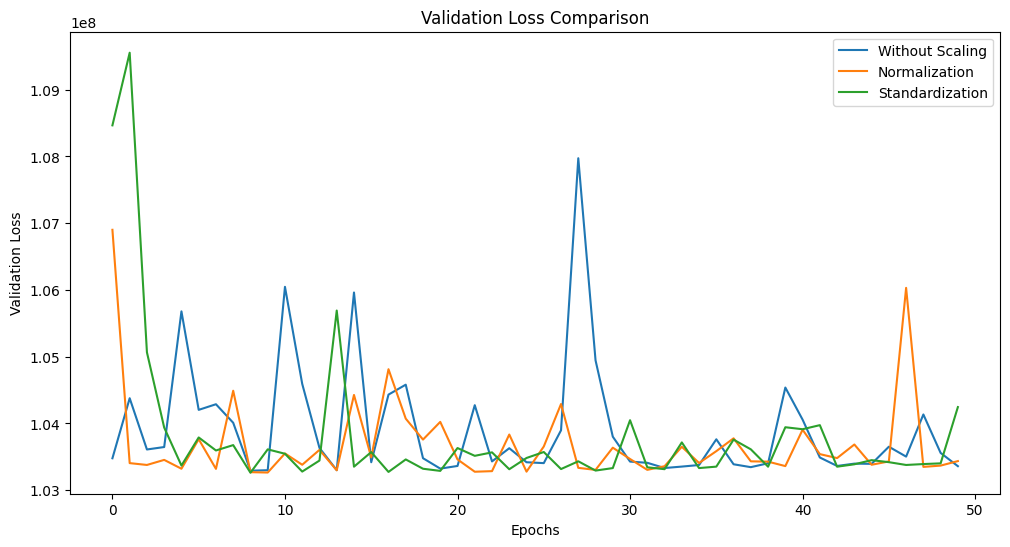

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LeakyReLU
from tensorflow.keras.optimizers import Adam
 

# قراءة البيانات
data = pd.read_excel("processed_dataset.xlsx")  # ضع اسم ملفك هنا

# فصل البيانات إلى ميزات وهدف
X = data.drop(columns=["car_prices_in_rupee"])  # الميزات
y = data["car_prices_in_rupee"]  # الهدف

# تقسيم البيانات إلى تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# تعريف النموذج
def build_model():
    model = Sequential([
        Dense(128, input_dim=X_train.shape[1]),
        LeakyReLU(alpha=0.1),
        Dense(64),
        LeakyReLU(alpha=0.1),
        Dense(32),
        LeakyReLU(alpha=0.1),
        Dense(1)  # مخرج واحد للتنبؤ
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

# التجربة الأولى: بدون تطبيع
model1 = build_model()
history1 = model1.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# التجربة الثانية: بعد التطبيع
scaler_norm = MinMaxScaler()
X_train_norm = scaler_norm.fit_transform(X_train)
X_test_norm = scaler_norm.transform(X_test)

model2 = build_model()
history2 = model2.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# التجربة الثالثة: بعد التوحيد القياسي
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std = scaler_std.transform(X_test)

model3 = build_model()
history3 = model3.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# مقارنة الأداء
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history1.history['val_loss'], label='Without Scaling')
plt.plot(history2.history['val_loss'], label='Normalization')
plt.plot(history3.history['val_loss'], label='Standardization')
plt.title('Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()


In [12]:
# حساب متوسط سعر السيارة
y_mean = y.mean()
print(f"Average Car Price: {y_mean}")

# حساب القيم النهائية للتجارب الثلاث
final_loss_1, final_mae_1 = model1.evaluate(X_test, y_test, verbose=0)
final_loss_2, final_mae_2 = model2.evaluate(X_test_norm, y_test, verbose=0)
final_loss_3, final_mae_3 = model3.evaluate(X_test_std, y_test, verbose=0)

# حساب الخطأ كنسبة مئوية لكل نموذج
mae_percent_1 = (final_mae_1 / y_mean) * 100
mae_percent_2 = (final_mae_2 / y_mean) * 100
mae_percent_3 = (final_mae_3 / y_mean) * 100

# عرض النتائج
print("Model 1 (Without Scaling):")
print(f"Final Loss: {final_loss_1}, Final MAE: {final_mae_1} ({mae_percent_1:.2f}%)\n")

print("Model 2 (Normalization):")
print(f"Final Loss: {final_loss_2}, Final MAE: {final_mae_2} ({mae_percent_2:.2f}%)\n")

print("Model 3 (Standardization):")
print(f"Final Loss: {final_loss_3}, Final MAE: {final_mae_3} ({mae_percent_3:.2f}%)\n")


Average Car Price: 1702.489900217707
Model 1 (Without Scaling):
Final Loss: 103360240.0, Final MAE: 2643.805908203125 (155.29%)

Model 2 (Normalization):
Final Loss: 105719136.0, Final MAE: 1305.06689453125 (76.66%)

Model 3 (Standardization):
Final Loss: 105697864.0, Final MAE: 1320.2333984375 (77.55%)



Epoch 1/50


c:\Users\Ali\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


138/138 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 180366352.0000 - mae: 5827.0415 - val_loss: 103735776.0000 - val_mae: 3120.2925
Epoch 2/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 154678816.0000 - mae: 4476.1909 - val_loss: 104678136.0000 - val_mae: 3524.2969
Epoch 3/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 168675920.0000 - mae: 4371.6611 - val_loss: 103507168.0000 - val_mae: 2974.4041
Epoch 4/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 169702144.0000 - mae: 4153.8594 - val_loss: 103820520.0000 - val_mae: 3175.9126
Epoch 5/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 149212528.0000 - mae: 3716.1426 - val_loss: 103269264.0000 - val_mae: 2525.4067
Epoch 6/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 129543160.0000 - mae: 3329.4436 - val_loss: 103260728.0000 - val_mae: 2535.7129
Epoch 7/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 127236840.0000 - mae: 3209.0188 - val_loss: 103413520.0000 - val_mae: 2261.3210
Epoch 8/50
138/138 ━━━━━━━━━━━━

c:\Users\Ali\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


138/138 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 154299168.0000 - mae: 5670.4727 - val_loss: 103582960.0000 - val_mae: 2905.1982
Epoch 2/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 146001088.0000 - mae: 4613.4531 - val_loss: 103452584.0000 - val_mae: 2848.8647
Epoch 3/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 154090176.0000 - mae: 4364.5283 - val_loss: 103464200.0000 - val_mae: 2864.2332
Epoch 4/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 121362616.0000 - mae: 3605.6880 - val_loss: 103266000.0000 - val_mae: 2538.5662
Epoch 5/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 149321728.0000 - mae: 3664.1228 - val_loss: 103393112.0000 - val_mae: 2822.2725
Epoch 6/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 148788208.0000 - mae: 3594.4636 - val_loss: 103423720.0000 - val_mae: 2857.8469
Epoch 7/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 135623520.0000 - mae: 3354.7156 - val_loss: 103408768.0000 - val_mae: 2850.6682
Epoch 8/50
138/138 ━━━━━━━━━━━━

c:\Users\Ali\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


138/138 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 164390816.0000 - mae: 4983.8633 - val_loss: 103865312.0000 - val_mae: 1953.4902
Epoch 2/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 142539200.0000 - mae: 4252.0078 - val_loss: 106124976.0000 - val_mae: 1391.3096
Epoch 3/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 164782784.0000 - mae: 4071.3108 - val_loss: 105450832.0000 - val_mae: 1377.2173
Epoch 4/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 151735008.0000 - mae: 3632.3613 - val_loss: 104655224.0000 - val_mae: 1622.4891
Epoch 5/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 127377496.0000 - mae: 3283.5481 - val_loss: 104036632.0000 - val_mae: 1877.6736
Epoch 6/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 146492768.0000 - mae: 3573.9692 - val_loss: 103763144.0000 - val_mae: 2018.2788
Epoch 7/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 159957792.0000 - mae: 3624.8101 - val_loss: 103291552.0000 - val_mae: 2476.7463
Epoch 8/50
138/138 ━━━━━━━━━━━━

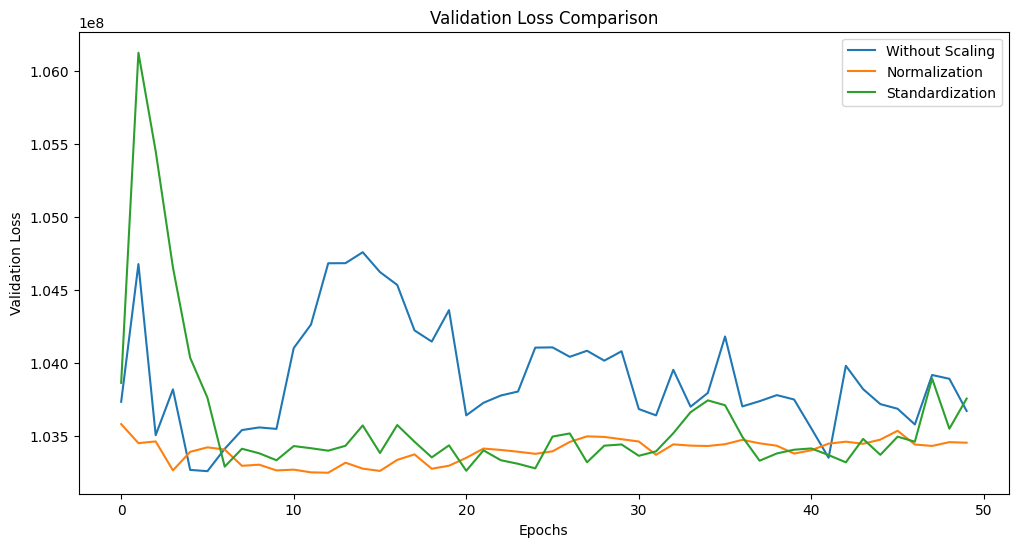

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LeakyReLU
from tensorflow.keras.optimizers import Adam
 

# قراءة البيانات
data = pd.read_excel("processed_dataset.xlsx")  # ضع اسم ملفك هنا

# فصل البيانات إلى ميزات وهدف
X = data.drop(columns=["car_prices_in_rupee"])  # الميزات
y = data["car_prices_in_rupee"]  # الهدف

# تقسيم البيانات إلى تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# تعريف النموذج
def build_model():
    model = Sequential([
        Dense(128, input_dim=X_train.shape[1], activation='relu'),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(1)  # مخرج واحد للتنبؤ
    ])
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse', metrics=['mae'])
    return model

# التجربة الأولى: بدون تطبيع
model1 = build_model()
history1 = model1.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# التجربة الثانية: بعد التطبيع
scaler_norm = MinMaxScaler()
X_train_norm = scaler_norm.fit_transform(X_train)
X_test_norm = scaler_norm.transform(X_test)

model2 = build_model()
history2 = model2.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# التجربة الثالثة: بعد التوحيد القياسي
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std = scaler_std.transform(X_test)

model3 = build_model()
history3 = model3.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# مقارنة الأداء
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history1.history['val_loss'], label='Without Scaling')
plt.plot(history2.history['val_loss'], label='Normalization')
plt.plot(history3.history['val_loss'], label='Standardization')
plt.title('Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()


In [16]:
# حساب متوسط سعر السيارة
y_mean = y.mean()
print(f"Average Car Price: {y_mean}")

# حساب القيم النهائية للتجارب الثلاث
final_loss_1, final_mae_1 = model1.evaluate(X_test, y_test, verbose=0)
final_loss_2, final_mae_2 = model2.evaluate(X_test_norm, y_test, verbose=0)
final_loss_3, final_mae_3 = model3.evaluate(X_test_std, y_test, verbose=0)

# حساب الخطأ كنسبة مئوية لكل نموذج
mae_percent_1 = (final_mae_1 / y_mean) * 100
mae_percent_2 = (final_mae_2 / y_mean) * 100
mae_percent_3 = (final_mae_3 / y_mean) * 100

# عرض النتائج
print("Model 1 (Without Scaling):")
print(f"Final Loss: {final_loss_1}, Final MAE: {final_mae_1} ({mae_percent_1:.2f}%)\n")

print("Model 2 (Normalization):")
print(f"Final Loss: {final_loss_2}, Final MAE: {final_mae_2} ({mae_percent_2:.2f}%)\n")

print("Model 3 (Standardization):")
print(f"Final Loss: {final_loss_3}, Final MAE: {final_mae_3} ({mae_percent_3:.2f}%)\n")


Average Car Price: 1702.489900217707
Model 1 (Without Scaling):
Final Loss: 103673080.0, Final MAE: 2042.0145263671875 (119.94%)

Model 2 (Normalization):
Final Loss: 105729072.0, Final MAE: 1305.645751953125 (76.69%)

Model 3 (Standardization):
Final Loss: 105728032.0, Final MAE: 1305.4749755859375 (76.68%)



car_prices_in_rupee       0
kms_driven                0
manufacture               0
engine                    0
Seats                     0
fuel_type_Cng             0
fuel_type_Diesel          0
fuel_type_Electric        0
fuel_type_Lpg             0
fuel_type_Petrol          0
transmission_Automatic    0
transmission_Manual       0
ownership_0th Owner       0
ownership_1st Owner       0
ownership_2nd Owner       0
ownership_3rd Owner       0
ownership_4th Owner       0
ownership_5th Owner       0
dtype: int64
Epoch 1/100


c:\Users\Ali\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


138/138 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 174224976.0000 - mae: 4093.8235 - val_loss: 103454080.0000 - val_mae: 2192.7537
Epoch 2/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 164921520.0000 - mae: 3579.4175 - val_loss: 103809760.0000 - val_mae: 1943.0707
Epoch 3/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 141420176.0000 - mae: 2946.0586 - val_loss: 103427504.0000 - val_mae: 2213.0215
Epoch 4/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 129285776.0000 - mae: 2789.1099 - val_loss: 103623592.0000 - val_mae: 3033.0154
Epoch 5/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 126582512.0000 - mae: 2993.0073 - val_loss: 103334320.0000 - val_mae: 2323.1401
Epoch 6/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 130202064.0000 - mae: 2868.8408 - val_loss: 103257968.0000 - val_mae: 2565.3467
Epoch 7/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 148379248.0000 - mae: 3152.5288 - val_loss: 103506592.0000 - val_mae: 2141.8726
Epoch 8/100
138/138 ━━━━━

c:\Users\Ali\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


138/138 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 135449216.0000 - mae: 1733.4384 - val_loss: 105390464.0000 - val_mae: 1411.7444
Epoch 2/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 121415936.0000 - mae: 1899.9320 - val_loss: 103396808.0000 - val_mae: 2704.8762
Epoch 3/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 147043472.0000 - mae: 3440.0510 - val_loss: 102193856.0000 - val_mae: 2730.8464
Epoch 4/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 98677440.0000 - mae: 2642.2798 - val_loss: 101829936.0000 - val_mae: 3193.1636
Epoch 5/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 123652952.0000 - mae: 3361.8594 - val_loss: 100523456.0000 - val_mae: 2931.6165
Epoch 6/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 155821920.0000 - mae: 3829.4824 - val_loss: 99258088.0000 - val_mae: 2635.2957
Epoch 7/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 150259984.0000 - mae: 3491.7241 - val_loss: 98304120.0000 - val_mae: 2719.9954
Epoch 8/100
138/138 ━━━━━━━━

c:\Users\Ali\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


138/138 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 121800184.0000 - mae: 1566.6158 - val_loss: 104905936.0000 - val_mae: 1400.9231
Epoch 2/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 140090944.0000 - mae: 2081.1296 - val_loss: 97187736.0000 - val_mae: 2698.0398
Epoch 3/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 120559440.0000 - mae: 3192.5002 - val_loss: 95483488.0000 - val_mae: 3461.7573
Epoch 4/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 106226552.0000 - mae: 3477.5234 - val_loss: 93544040.0000 - val_mae: 3285.8420
Epoch 5/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 122700624.0000 - mae: 3641.4358 - val_loss: 92060328.0000 - val_mae: 3142.7119
Epoch 6/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 111105384.0000 - mae: 3407.5154 - val_loss: 90900968.0000 - val_mae: 3101.6677
Epoch 7/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 108130856.0000 - mae: 3181.4797 - val_loss: 90408416.0000 - val_mae: 3123.2991
Epoch 8/100
138/138 ━━━━━━━━━━━

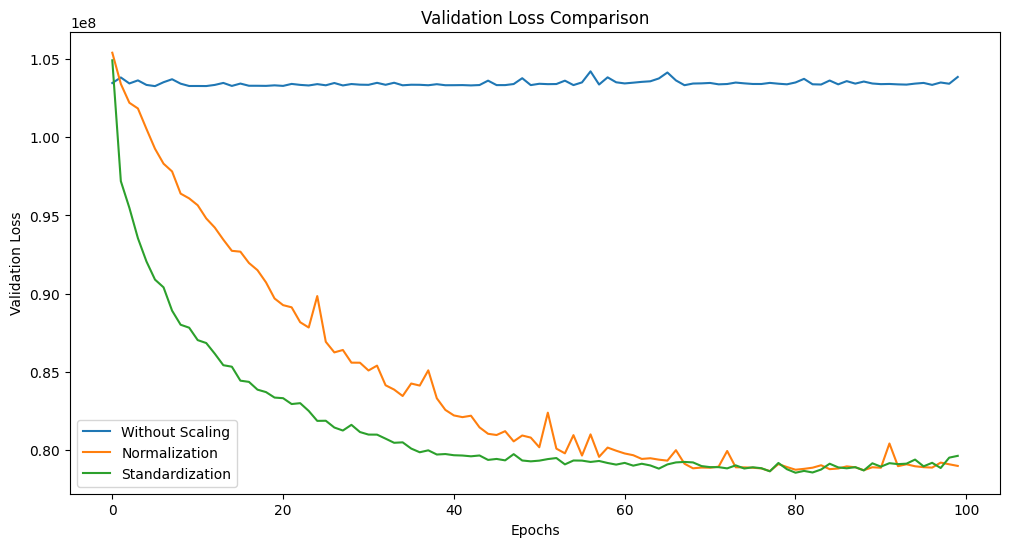

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# قراءة البيانات
data = pd.read_excel("processed_dataset.xlsx")

# التحقق من وجود قيم مفقودة
print(data.isnull().sum())

# تحويل البيانات إلى نوع float لتجنب الأخطاء
data = data.astype(float)

# فصل البيانات إلى ميزات وهدف
X = data.drop(columns=["car_prices_in_rupee"])  # الميزات
y = data["car_prices_in_rupee"]  # الهدف

# تقسيم البيانات إلى تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


def build_model(input_shape):
    model = Sequential([
        Dense(128, input_dim=input_shape, activation='relu'),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(1)  # مخرج واحد للتنبؤ
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

# التجربة الأولى: بدون تطبيع
model1 = build_model(X_train.shape[1])
history1 = model1.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# التجربة الثانية: بعد التطبيع
scaler_norm = MinMaxScaler()
X_train_norm = scaler_norm.fit_transform(X_train)
X_test_norm = scaler_norm.transform(X_test)

model2 = build_model(X_train.shape[1])
history2 = model2.fit(X_train_norm, y_train, epochs=100, batch_size=32, validation_data=(X_test_norm, y_test), verbose=1)

# التجربة الثالثة: بعد التوحيد القياسي
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std = scaler_std.transform(X_test)

model3 = build_model(X_train.shape[1])
history3 = model3.fit(X_train_std, y_train, epochs=100, batch_size=32, validation_data=(X_test_std, y_test), verbose=1)

plt.figure(figsize=(12, 6))
plt.plot(history1.history['val_loss'], label='Without Scaling')
plt.plot(history2.history['val_loss'], label='Normalization')
plt.plot(history3.history['val_loss'], label='Standardization')
plt.title('Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

In [19]:
# حساب متوسط سعر السيارة
y_mean = y.mean()
print(f"Average Car Price: {y_mean}")

# حساب القيم النهائية للتجارب الثلاث
final_loss_1, final_mae_1 = model1.evaluate(X_test, y_test, verbose=0)
final_loss_2, final_mae_2 = model2.evaluate(X_test_norm, y_test, verbose=0)
final_loss_3, final_mae_3 = model3.evaluate(X_test_std, y_test, verbose=0)

# حساب الخطأ كنسبة مئوية لكل نموذج
mae_percent_1 = (final_mae_1 / y_mean) * 100
mae_percent_2 = (final_mae_2 / y_mean) * 100
mae_percent_3 = (final_mae_3 / y_mean) * 100

# عرض النتائج
print("Model 1 (Without Scaling):")
print(f"Final Loss: {final_loss_1}, Final MAE: {final_mae_1} ({mae_percent_1:.2f}%)\n")

print("Model 2 (Normalization):")
print(f"Final Loss: {final_loss_2}, Final MAE: {final_mae_2} ({mae_percent_2:.2f}%)\n")

print("Model 3 (Standardization):")
print(f"Final Loss: {final_loss_3}, Final MAE: {final_mae_3} ({mae_percent_3:.2f}%)\n")

Average Car Price: 1702.489900217707
Model 1 (Without Scaling):
Final Loss: 103843704.0, Final MAE: 2060.69580078125 (121.04%)

Model 2 (Normalization):
Final Loss: 79003080.0, Final MAE: 2085.447021484375 (122.49%)

Model 3 (Standardization):
Final Loss: 79646920.0, Final MAE: 1876.8836669921875 (110.24%)



NaN values:
 index                  0
car_prices_in_rupee    0
kms_driven             0
manufacture            0
engine                 0
Seats                  0
dtype: int64
Inf values:
 index                  0
car_prices_in_rupee    0
kms_driven             0
manufacture            0
engine                 0
Seats                  0
dtype: int64
Epoch 1/100


c:\Users\Ali\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Ali\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


131/131 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan - learning_rate: 1.0000e-04
Epoch 2/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan - learning_rate: 1.0000e-04
Epoch 3/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan - learning_rate: 1.0000e-04
Epoch 4/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan - learning_rate: 1.0000e-04
Epoch 5/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan - learning_rate: 1.0000e-04
Epoch 6/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan - learning_rate: 1.0000e-04
Epoch 7/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan - learning_rate: 1.0000e-04
Epoch 8/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: nan - 

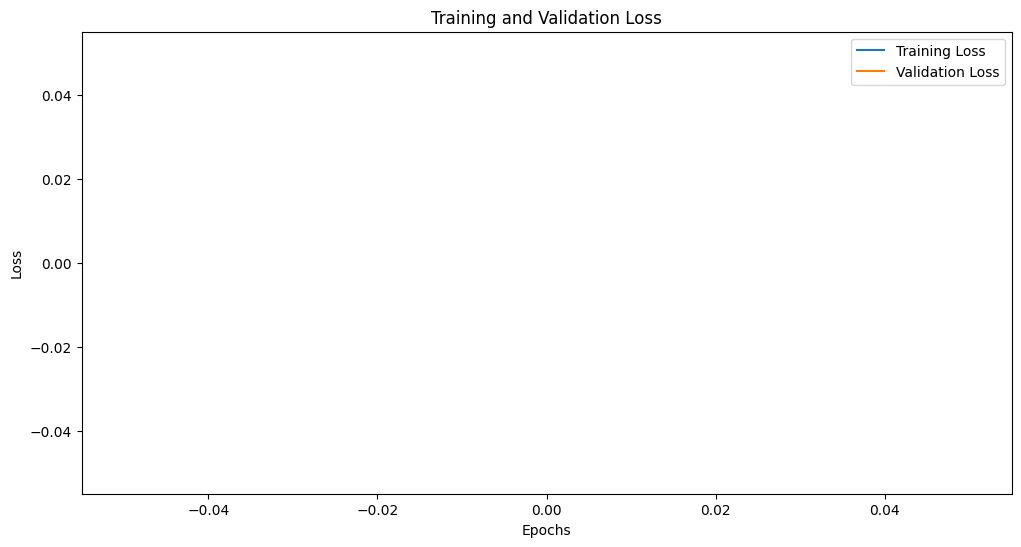

Improved Model (Normalization):
Final Loss: nan, Final MAE: nan (nan%)

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


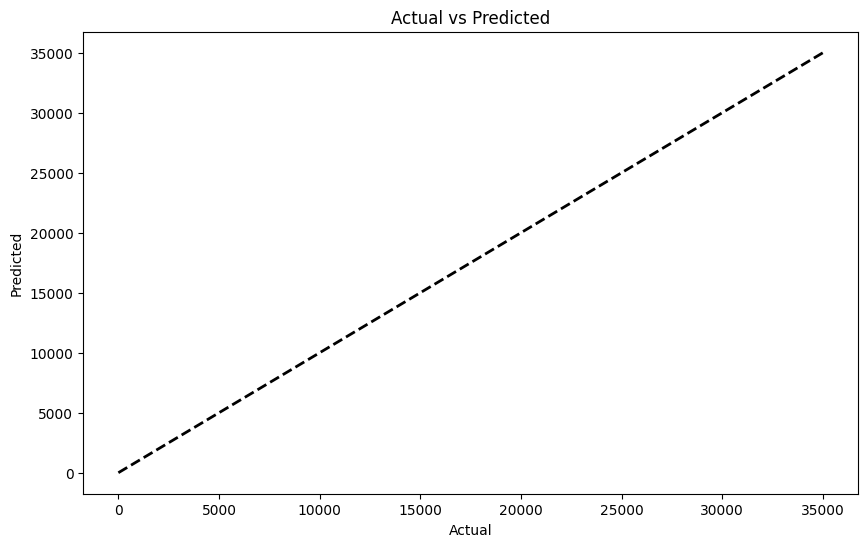

In [32]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from scipy.stats import zscore

# قراءة البيانات
file_path = 'car_price.csv'
data = pd.read_csv(file_path)

# تنظيف البيانات
def clean_data(data):
    # إزالة النصوص وتحويل القيم إلى أرقام
    data['kms_driven'] = data['kms_driven'].str.replace(' kms', '').str.replace(',', '').astype(float)
    data['engine'] = data['engine'].str.replace(' cc', '').astype(float)
    data['Seats'] = data['Seats'].str.replace(' Seats', '').astype(float)
    
    # تحويل السعر إلى رقم
    def convert_price(price):
        price = price.replace(',', '')
        if 'Lakh' in price:
            return float(price.replace(' Lakh', ''))
        elif 'Crore' in price:
            return float(price.replace(' Crore', '')) * 100
        return float(price)
    
    data['car_prices_in_rupee'] = data['car_prices_in_rupee'].apply(convert_price)
    
    # استخراج الماركة من car_name
    data['brand'] = data['car_name'].apply(lambda x: re.split(r'\s+', x)[0])
    
    return data

data = clean_data(data)

# تحديد الأعمدة الرقمية فقط
numeric_cols = data.select_dtypes(include=[np.number]).columns

# التحقق من وجود قيم NaN أو inf في الأعمدة الرقمية فقط
print("NaN values:\n", data[numeric_cols].isnull().sum())
print("Inf values:\n", np.isinf(data[numeric_cols]).sum())

# إزالة الصفوف التي تحتوي على قيم NaN أو inf في الأعمدة الرقمية
data = data.dropna(subset=numeric_cols)
data = data[~np.isinf(data[numeric_cols]).any(axis=1)]

# إزالة القيم المتطرفة باستخدام Z-score
z_scores = np.abs(zscore(data[numeric_cols]))
data = data[(z_scores < 3).all(axis=1)]

# تشفير الأعمدة الفئوية
def encode_categorical(data):
    categorical_cols = ['fuel_type', 'transmission', 'ownership', 'brand']
    encoder = OneHotEncoder()
    encoded_cols = pd.DataFrame(encoder.fit_transform(data[categorical_cols]).toarray())
    encoded_cols.columns = encoder.get_feature_names_out(categorical_cols)
    
    # دمج الأعمدة المشفرة مع البيانات الأصلية
    data = data.join(encoded_cols)
    data = data.drop(categorical_cols + ['car_name'], axis=1)
    
    return data

data = encode_categorical(data)

# إضافة عمر السيارة
current_year = pd.Timestamp.now().year
data['car_age'] = current_year - data['manufacture']

# تقسيم البيانات إلى Features و Target
X = data.drop('car_prices_in_rupee', axis=1)
y = data['car_prices_in_rupee']

# تقسيم البيانات إلى تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# تطبيع البيانات
scaler_norm = MinMaxScaler()
X_train_norm = scaler_norm.fit_transform(X_train)
X_test_norm = scaler_norm.transform(X_test)

# بناء النموذج
def build_complex_model(input_dim):
    model = Sequential([
        Dense(512, input_dim=input_dim),
        LeakyReLU(alpha=0.1),
        Dropout(0.3),
        Dense(256),
        LeakyReLU(alpha=0.1),
        Dropout(0.3),
        Dense(128),
        LeakyReLU(alpha=0.1),
        Dropout(0.3),
        Dense(64),
        LeakyReLU(alpha=0.1),
        Dropout(0.3),
        Dense(32),
        LeakyReLU(alpha=0.1),
        Dropout(0.3),
        Dense(1)  # مخرج واحد للتنبؤ
    ])
    model.compile(optimizer=Adam(learning_rate=0.0001, clipvalue=1.0), loss='mse', metrics=['mae'])
    return model

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Learning Rate Scheduler
def lr_scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * 0.9  # تقليل معدل التعلم بنسبة 10% كل 10 epochs

lr_callback = LearningRateScheduler(lr_scheduler)

# تدريب النموذج
model = build_complex_model(X_train_norm.shape[1])
history = model.fit(
    X_train_norm, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test_norm, y_test),
    callbacks=[early_stopping, lr_callback],
    verbose=1
)

# رسم Learning Curves
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# تقييم النموذج
final_loss, final_mae = model.evaluate(X_test_norm, y_test, verbose=0)
y_mean = y.mean()
mae_percent = (final_mae / y_mean) * 100

print("Improved Model (Normalization):")
print(f"Final Loss: {final_loss}, Final MAE: {final_mae} ({mae_percent:.2f}%)\n")

# رسم القيم الفعلية مقابل القيم المتوقعة
y_pred = model.predict(X_test_norm)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()